# Projet 10 : Detecter des faux billets avec R ou Python

## 1. Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import decomposition

from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from matplotlib.collections import LineCollection

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
import statsmodels

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importer le dataset billets
data = pd.read_csv('billets.csv',sep = ';')
billets=data.copy()
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
# encoder la colonne 'is_genuine' en 0 et 1
billets['is_genuine'] = billets['is_genuine'].astype(int)

In [4]:
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


### 1. DEFINITION DES VARIABLES

#### Dimensions géométriques
#### Nous disposons actuellement de six informations géométriques sur un billet :

#### length : la longueur du billet (en mm)
#### height_left : la hauteur du billet (mesurée sur le côté gauche, en mm)


#### height_right : la hauteur du billet (mesurée sur le côté droit, en mm) ;
#### margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;


#### margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;


#### diagonal : la diagonale du billet (en mm).



## 2. Analyse Descriptive

In [5]:
data.shape

(1500, 7)

In [6]:
# vérifier les valeurs que prend la colonne is_genuine
billets['is_genuine'].unique()

array([1, 0])

In [7]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int32  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 76.3 KB


In [8]:
# Vérifier les doublons 
billets.duplicated().sum()

0

In [9]:
# Vérification des valeurs manquantes
billets.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Text(0.5, 1.0, 'Taux des vrais et faux billets')

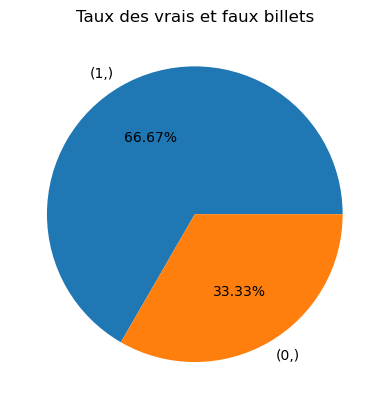

In [10]:
# afficher les taux de faux billets et des vrais billets
billets[['is_genuine']].value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Taux des vrais et faux billets')

Text(0.5, 1.0, 'length')

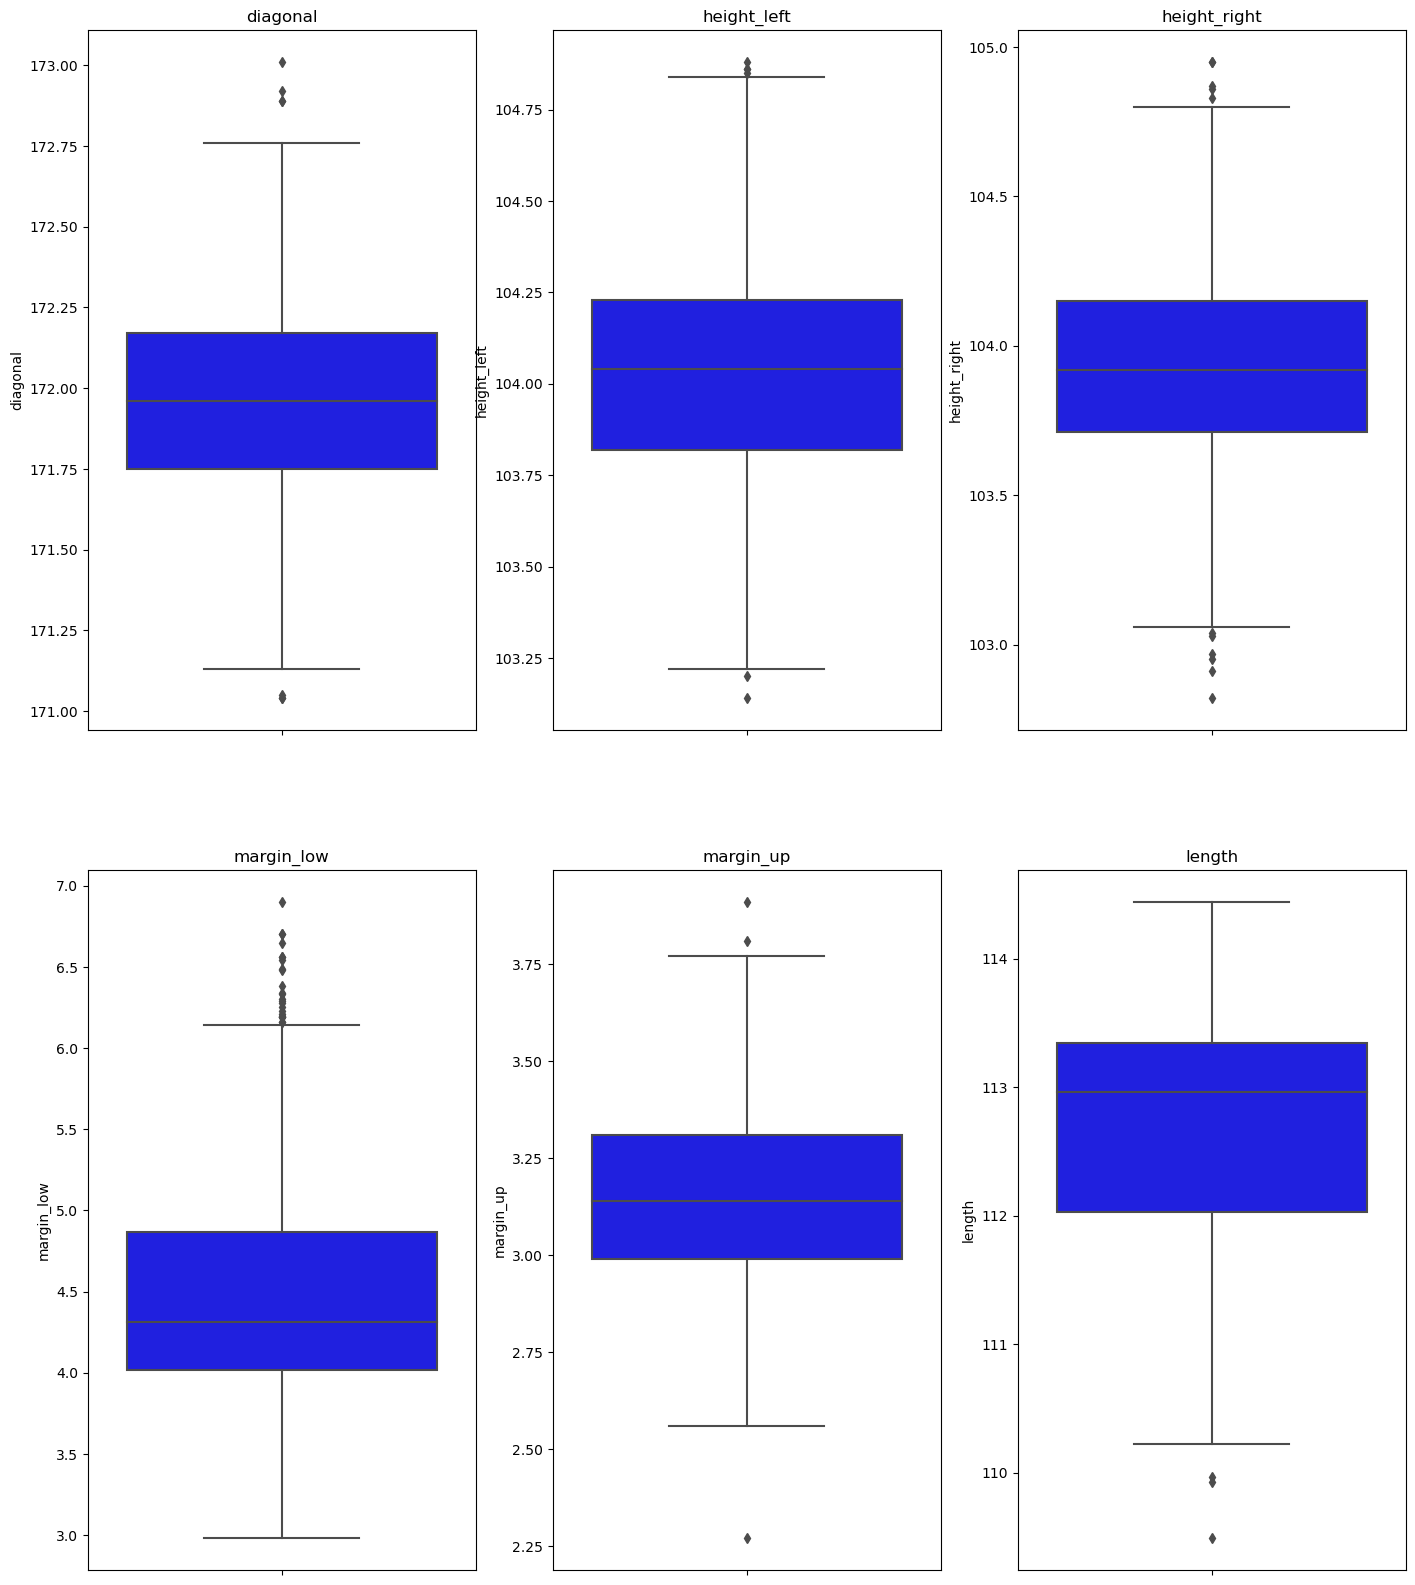

In [11]:
# Distribution des données en boîte à moustaches
f, axes = plt.subplots(2,3,figsize = (17,20))
sns.boxplot(y='diagonal', data=billets,ax=axes[0, 0],color="blue")
axes[0, 0].set_title('diagonal')
sns.boxplot(y='height_left', data=billets,ax=axes[0, 1],color="blue")
axes[0, 1].set_title('height_left')
sns.boxplot(y='height_right', data=billets,ax=axes[0, 2],color="blue")
axes[0, 2].set_title('height_right')
sns.boxplot(y='margin_low', data=billets,ax=axes[1, 0],color="blue")
axes[1, 0].set_title('margin_low')
sns.boxplot(y='margin_up', data=billets,ax=axes[1, 1],color="blue")
axes[1, 1].set_title('margin_up')
sns.boxplot(y='length', data=billets,ax=axes[1, 2],color="blue")
axes[1, 2].set_title('length')

On constate des outliers dans toutes les variables cependant nous allons les garder pour ce projet car ils vont nous etre utiles dans le but de pouvoir differencier les VRAI des FAUX billets

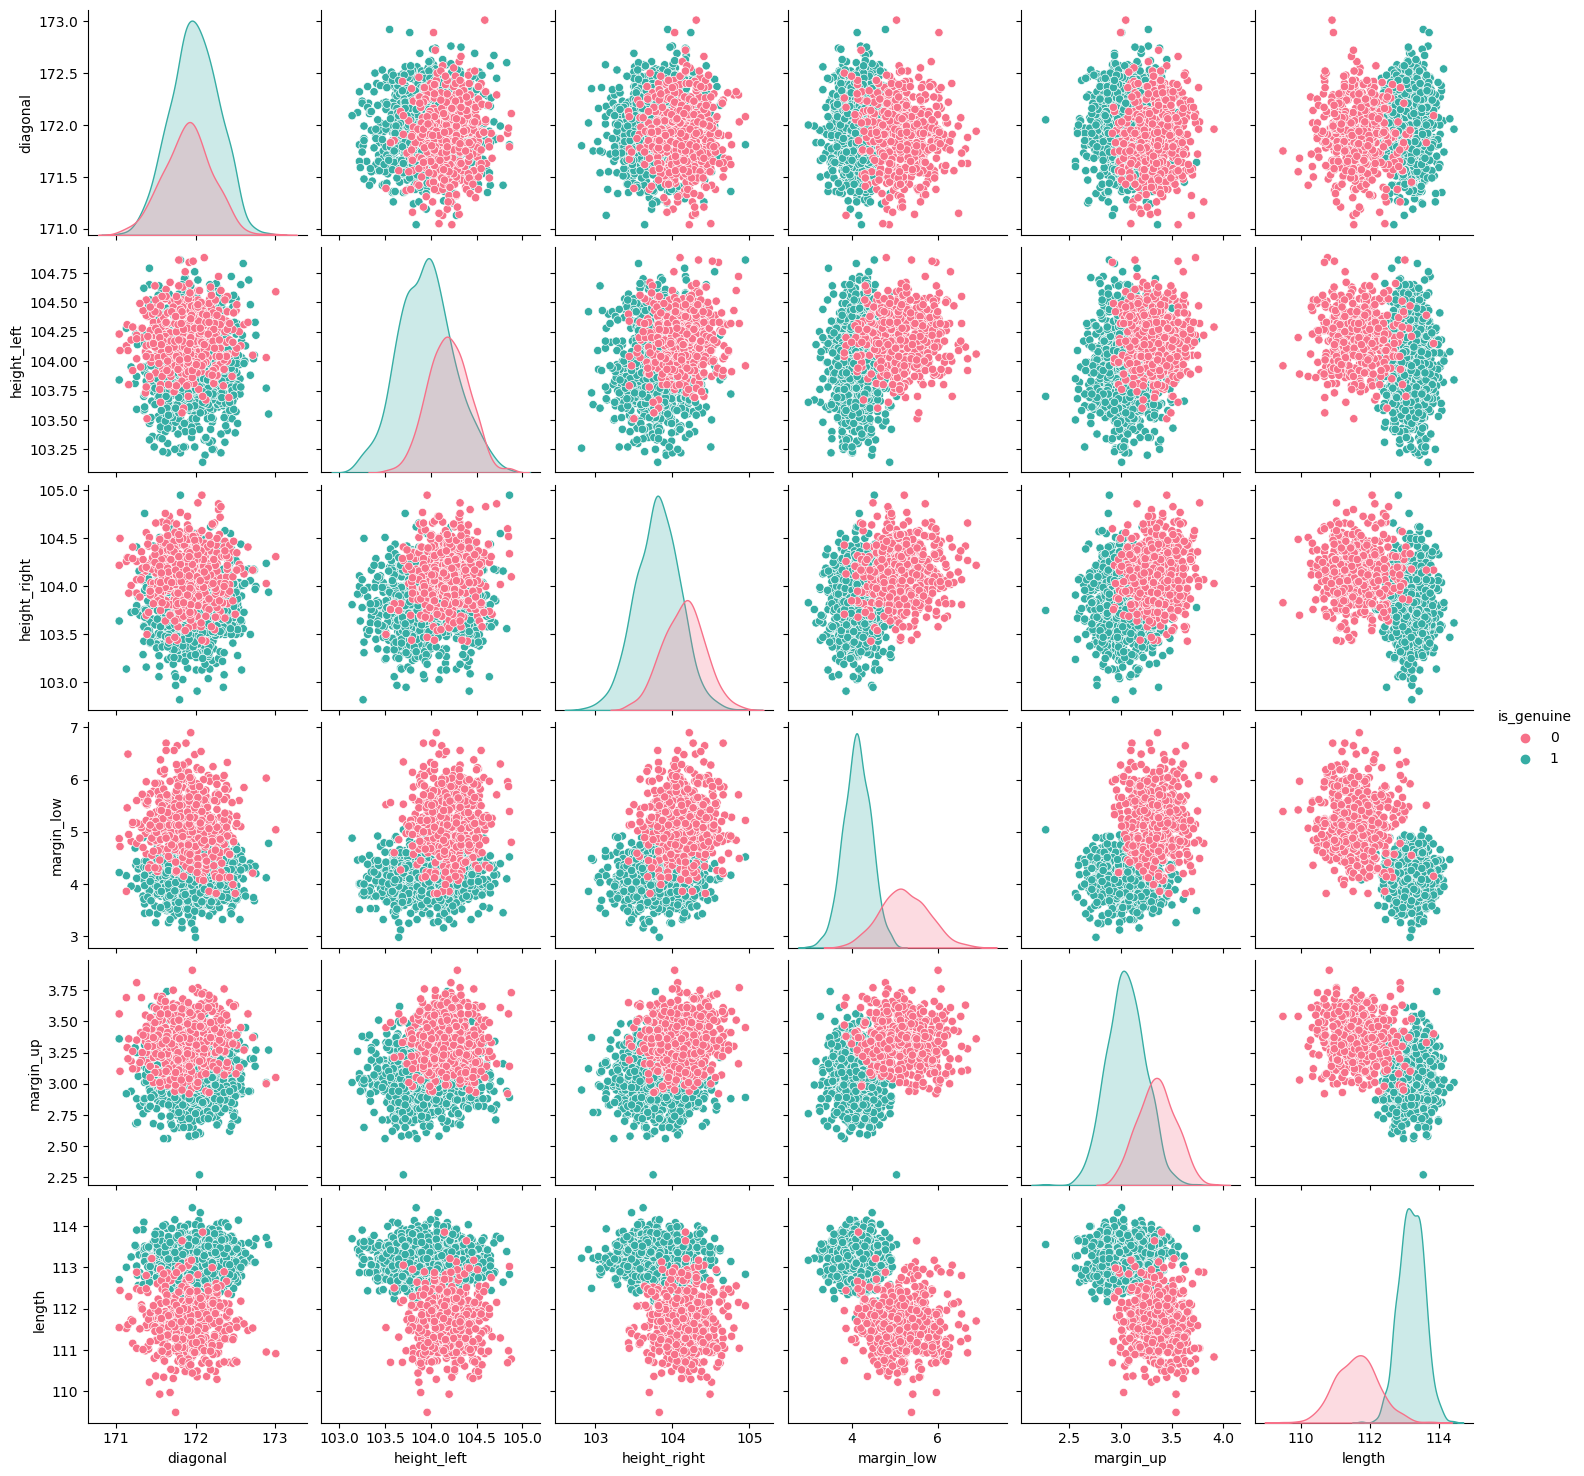

In [12]:
sns.pairplot(data=billets, hue='is_genuine',palette="husl")

Text(0.5, 1.0, 'length')

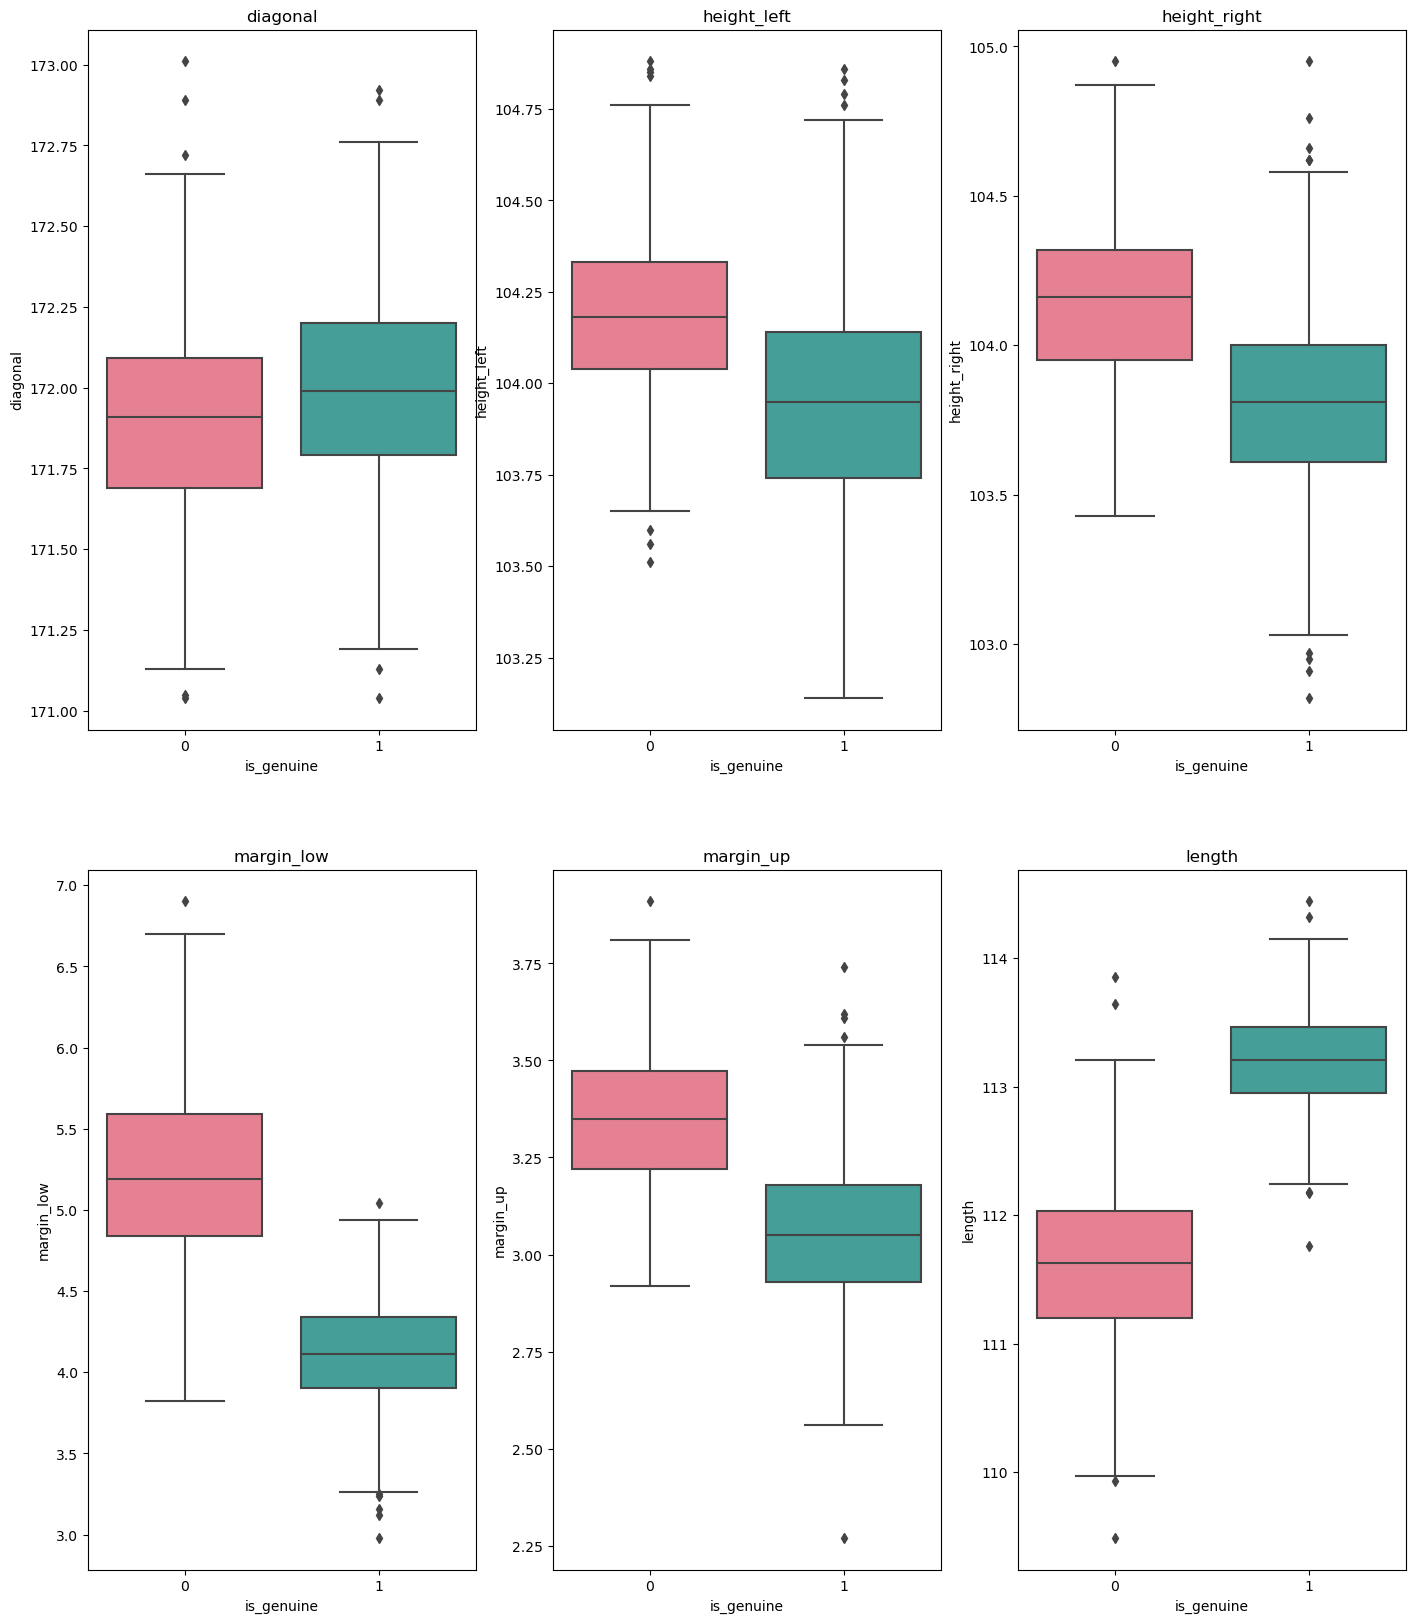

In [13]:
# Distribution des données en boîte à moustaches
f, axes = plt.subplots(2,3,figsize = (17,20))
sns.boxplot(y='diagonal', x='is_genuine', data=billets,ax=axes[0, 0],palette="husl")
axes[0, 0].set_title('diagonal')
sns.boxplot(y='height_left', x='is_genuine', data=billets,ax=axes[0, 1],palette="husl")
axes[0, 1].set_title('height_left')
sns.boxplot(y='height_right', x='is_genuine', data=billets,ax=axes[0, 2],palette="husl")
axes[0, 2].set_title('height_right')
sns.boxplot(y='margin_low', x='is_genuine', data=billets,ax=axes[1, 0],palette="husl")
axes[1, 0].set_title('margin_low')
sns.boxplot(y='margin_up', x='is_genuine', data=billets,ax=axes[1, 1],palette="husl")
axes[1, 1].set_title('margin_up')
sns.boxplot(y='length', x='is_genuine', data=billets,ax=axes[1, 2],palette="husl")
axes[1, 2].set_title('length')

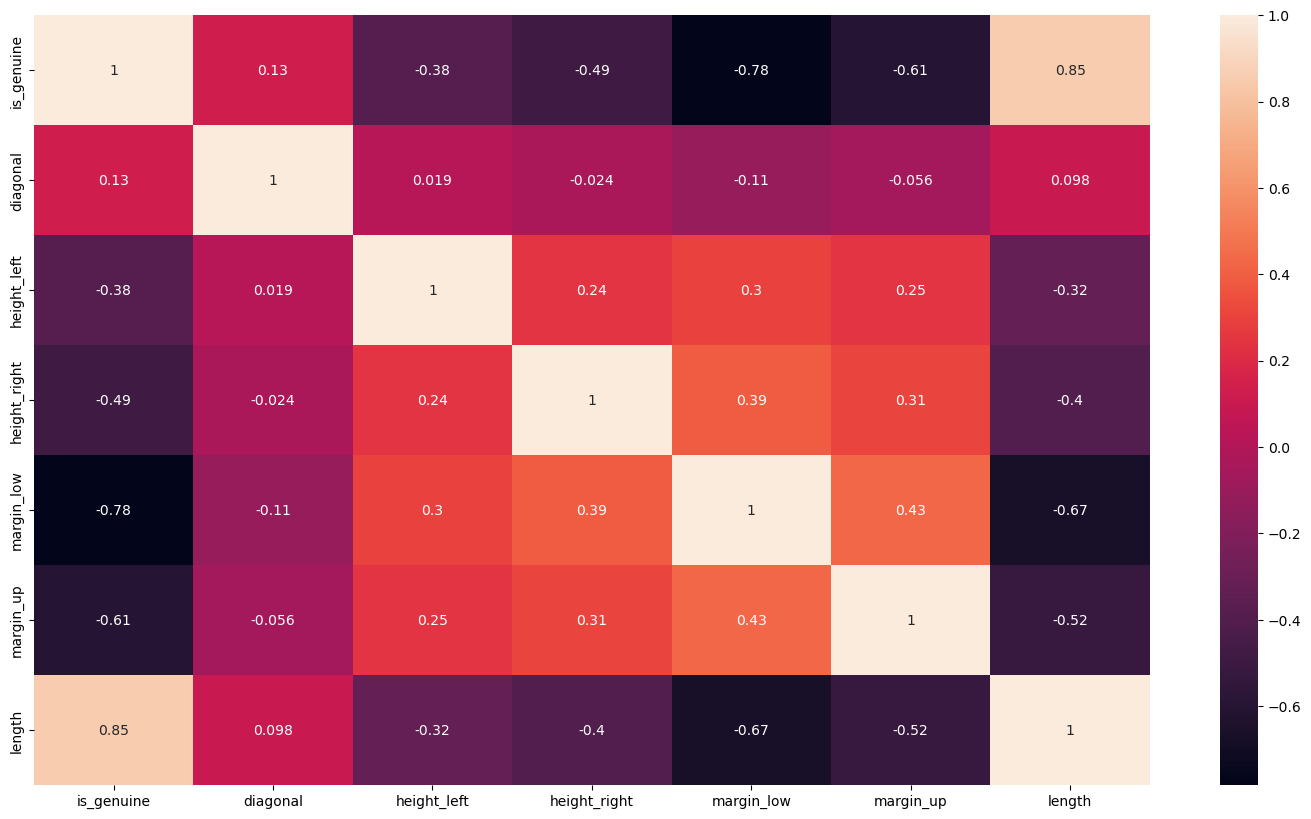

In [14]:
# Vérification de corrélation entre les variables
plt.figure(figsize=(18,10))
sns.heatmap(billets.corr(), annot=True)
plt.show()

In [15]:
# Dataframe ne comprenant pas les valeurs manquantes:
donnees_sans_nan = billets.dropna(how='any')
donnees_sans_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   int32  
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 85.7 KB


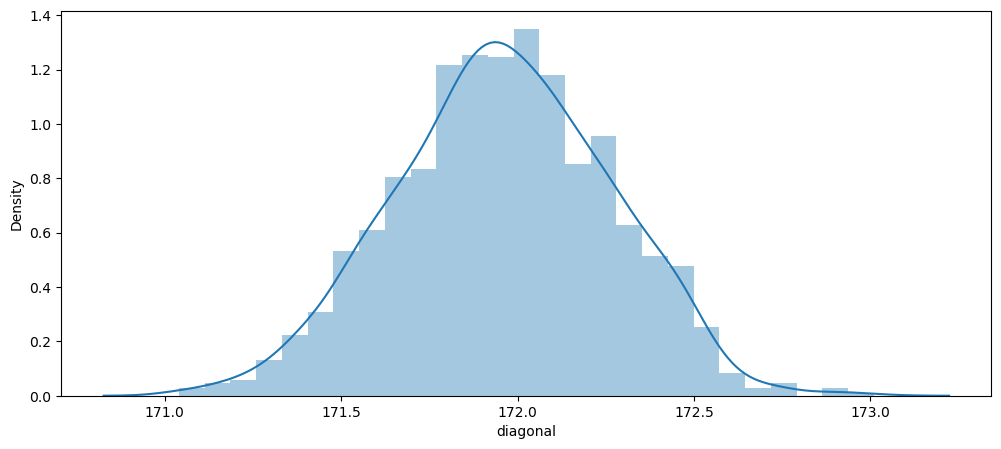

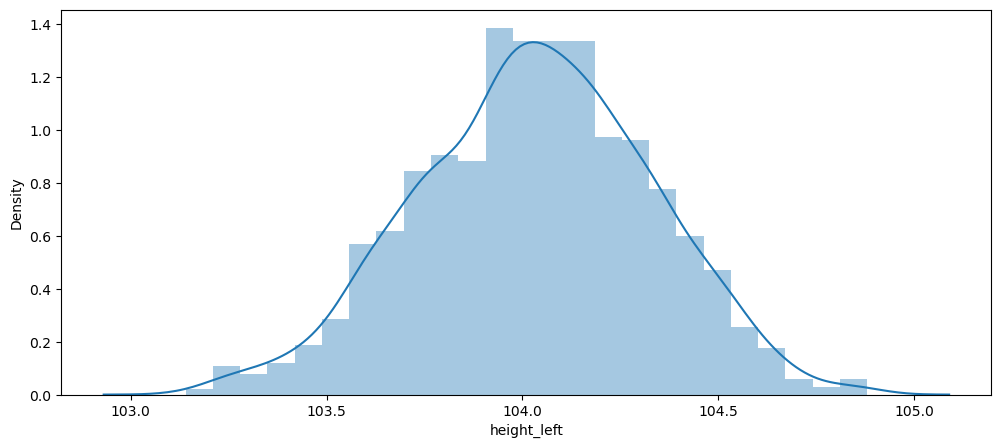

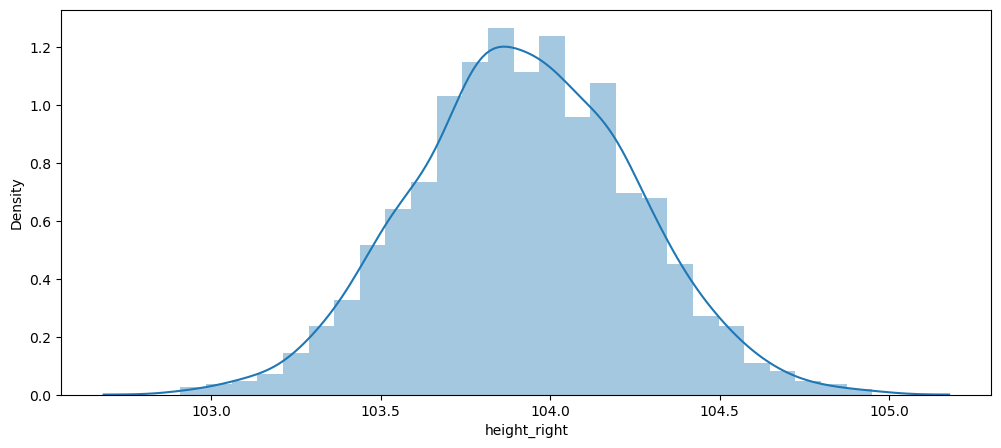

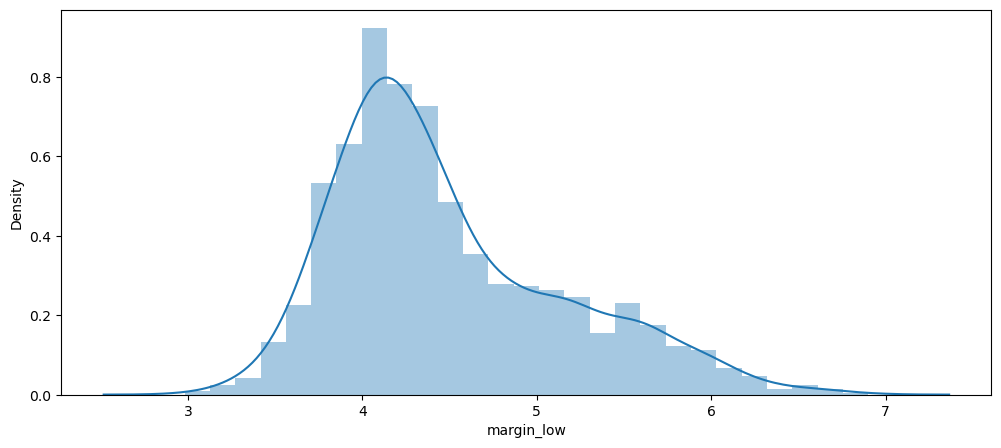

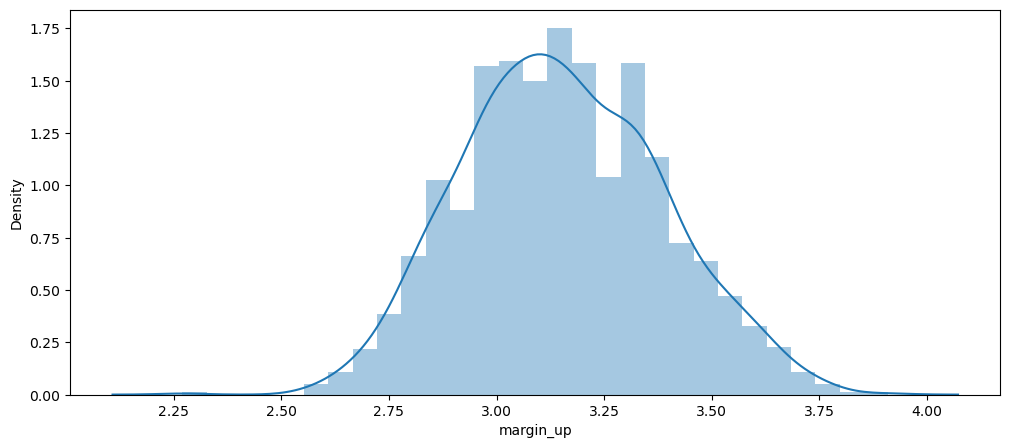

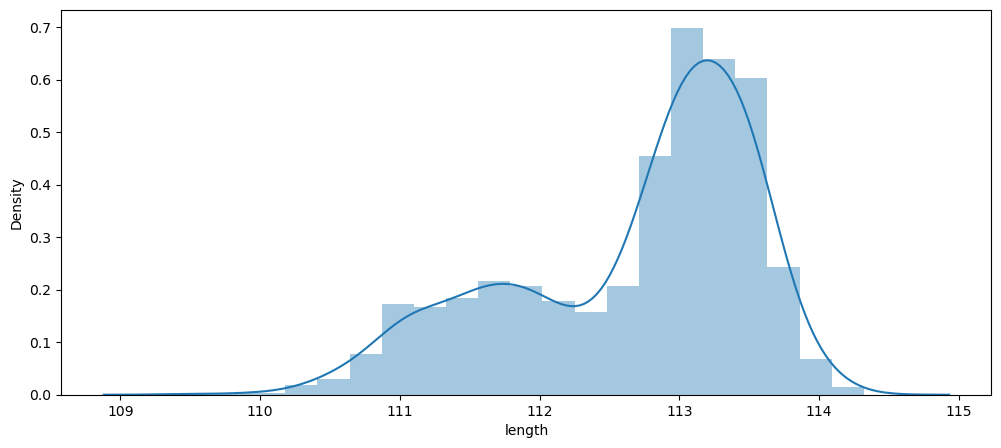

In [16]:
def distribution (donnees_sans_nan): 

    variable = donnees_sans_nan.columns[1:]

    for i in variable : 
        plt.figure(figsize=(12,5))
        sns.distplot(donnees_sans_nan[i])
        plt.show()
distribution (donnees_sans_nan)

### Observation sur l'analyse descriptive :

1500 lignes répresentant les 1500 billets et 7 variables (6 sur la dimension des billets et une boléenne sur le type de billet VRAI/FAUX)

On remarque la présence de **37 valeurs nulles** dans le variable "margin_low"

Les variables **"length" et "margin low"** séparent le mieux les vrais des faux billets

**66.6%** de vrais billet et **33.3%** de faux billets dans le jeu de données.

La heatmap permet de mettre en relief les corrélations observables dans le dataframe. Dans cette heatmap, on peut mettre en évidence **un lien positif fort entre la variable 'length' et 'is_genuine’, un lien négatif fort entre 'margin_low' et 'is_genuine’, egalement entre 'margin_low’ et ‘length’.**



## 3. Analyse exploratoire

### Test de la normalité des distributions (Shapiro-Wilk )

Avec un risque premier alpha de 5%, on émet les deux hypothèses suivantes:

H0:la variable suit une loi normale

H1:la variable ne suit pas une loi normale

In [17]:
DSN=donnees_sans_nan.drop(columns= ['is_genuine'])
DSN.columns.values.tolist()

['diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length']

In [18]:
#ShapiroTest:
alpha = 0.05

In [19]:
from scipy import stats

for i in DSN.iloc[:,:]:
    stat, pvalue = stats.shapiro(donnees_sans_nan[i])
    print(pvalue)
    if pvalue > alpha:
        print("Les données suivent une loi normale")
    else:
        print("Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale")

0.2687021493911743
Les données suivent une loi normale
0.05763062462210655
Les données suivent une loi normale
0.9576431512832642
Les données suivent une loi normale
2.8283876088209786e-24
Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale
0.0004760113952215761
Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale
1.0767076021107087e-27
Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale


### Test des differences entre les billets 'True' et 'False'

On va tester l'égalité des variances avec le test de Levene pour les variables qui suivent une loi normale afin de determiner si nous faisons un test de Student ou un test de Welch par la suite et Man - Withney pour les variables ne suivent pas une loi normale

### Test de Levene

In [20]:
from scipy.stats import levene
import pandas as pd

# Liste des noms de variables
variables = ["diagonal", "height_left", "height_right"]

# Niveau de signification
niveau_significatif = 0.05

for variable in variables:
    # Séparation des échantillons en fonction de la variable binaire 'is_genuine'
    groupe1 = donnees_sans_nan[donnees_sans_nan['is_genuine'] == True][variable]
    groupe2 = donnees_sans_nan[donnees_sans_nan['is_genuine'] == False][variable]

    # Test de Levene pour l'égalité des variances
    statistique, p_valeur = levene(groupe1, groupe2)

    # Afficher les résultats pour chaque variable
    print(f"Variable : {variable}")
    print("Statistique de Levene :", statistique)
    print("P-valeur :", p_valeur)

    # Interprétation du résultat
    if p_valeur > niveau_significatif:
        print("Pas suffisamment de preuves pour rejeter l'hypothèse nulle (égalité des variances)\n")
    else:
        print("Les variances sont statistiquement différentes.\n")


Variable : diagonal
Statistique de Levene : 0.12571686270898524
P-valeur : 0.7229661175157234
Pas suffisamment de preuves pour rejeter l'hypothèse nulle (égalité des variances)

Variable : height_left
Statistique de Levene : 42.350386932887965
P-valeur : 1.0457802387852748e-10
Les variances sont statistiquement différentes.

Variable : height_right
Statistique de Levene : 1.329665358267531
P-valeur : 0.24905337703204727
Pas suffisamment de preuves pour rejeter l'hypothèse nulle (égalité des variances)



Observation : 

Nous allons utiliser le test de Student pour "diagonal" et "height_right" car les variances ne sont pas statistiquement différentes.

Nous allons utiliser le test de Welch pour "height_left" car les variances sont statistiquement différentes.

### Test de Student

In [21]:
from scipy.stats import ttest_ind

# Séparation des échantillons en fonction de la variable binaire 'is_genuine'
groupe1_diagonal = donnees_sans_nan[donnees_sans_nan['is_genuine'] == True]['diagonal']
groupe2_diagonal = donnees_sans_nan[donnees_sans_nan['is_genuine'] == False]['diagonal']

groupe1_height_right = donnees_sans_nan[donnees_sans_nan['is_genuine'] == True]['height_right']
groupe2_height_right = donnees_sans_nan[donnees_sans_nan['is_genuine'] == False]['height_right']

# Test de Student pour "diagonal"
stat_diagonal, p_val_diagonal = ttest_ind(groupe1_diagonal, groupe2_diagonal)

# Test de Student pour "height_right"
stat_height_right, p_val_height_right = ttest_ind(groupe1_height_right, groupe2_height_right)

# Afficher les résultats
print("Test de Student pour la variable 'diagonal':")
print("Statistique de test :", stat_diagonal)
print("P-valeur :", p_val_diagonal)

print("\nTest de Student pour la variable 'height_right':")
print("Statistique de test :", stat_height_right)
print("P-valeur :", p_val_height_right)


Test de Student pour la variable 'diagonal':
Statistique de test : 5.1967708778045365
P-valeur : 2.3146624660826948e-07

Test de Student pour la variable 'height_right':
Statistique de test : -21.32295346909739
P-valeur : 4.708598379129022e-88


En conclusion, les deux variables 'diagonal' et 'height_right' semblent avoir une influence significative sur la variable binaire 'is_genuine'. Les différences statistiquement significatives dans les moyennes entre les groupes suggèrent que ces variables peuvent être importantes pour prédire la variable 'is_genuine'.

### Test de Welch

In [22]:
from scipy.stats import ttest_ind

# Séparation des échantillons en fonction de la variable binaire 'is_genuine'
groupe1_height_left = donnees_sans_nan[donnees_sans_nan['is_genuine'] == True]['height_left']
groupe2_height_left = donnees_sans_nan[donnees_sans_nan['is_genuine'] == False]['height_left']

# Test de Welch pour "height_left"
stat_height_left, p_val_height_left = ttest_ind(groupe1_height_left, groupe2_height_left, equal_var=False)

# Afficher les résultats
print("\nTest de Welch pour la variable 'height_left':")
print("Statistique de test :", stat_height_left)
print("P-valeur :", p_val_height_left)



Test de Welch pour la variable 'height_left':
Statistique de test : -16.918693070906215
P-valeur : 4.851593599662053e-58


En conclusion, les résultats du test de Welch indiquent qu'il y a une influence significative de la variable "height_left" sur la variable binaire "is_genuine". La différence statistiquement significative entre les moyennes suggère que la variable "height_left" est un facteur important pour prédire la variable "is_genuine"

### Test de Man-Withney

In [23]:
from scipy.stats import mannwhitneyu

# Séparation des échantillons en fonction de la variable binaire 'is_genuine'
groupe1_margin_low = donnees_sans_nan[donnees_sans_nan['is_genuine'] == True]['margin_low']
groupe2_margin_low = donnees_sans_nan[donnees_sans_nan['is_genuine'] == False]['margin_low']

groupe1_margin_up = donnees_sans_nan[donnees_sans_nan['is_genuine'] == True]['margin_up']
groupe2_margin_up = donnees_sans_nan[donnees_sans_nan['is_genuine'] == False]['margin_up']

groupe1_length = donnees_sans_nan[donnees_sans_nan['is_genuine'] == True]['length']
groupe2_length = donnees_sans_nan[donnees_sans_nan['is_genuine'] == False]['length']

# Test de Mann-Whitney pour 'margin_low'
stat_margin_low, p_val_margin_low = mannwhitneyu(groupe1_margin_low, groupe2_margin_low)

# Test de Mann-Whitney pour 'margin_up'
stat_margin_up, p_val_margin_up = mannwhitneyu(groupe1_margin_up, groupe2_margin_up)

# Test de Mann-Whitney pour 'length'
stat_length, p_val_length = mannwhitneyu(groupe1_length, groupe2_length)

# Afficher les résultats
print("\nTest de Mann-Whitney pour la variable 'margin_low':")
print("Statistique de test :", stat_margin_low)
print("P-valeur :", p_val_margin_low)

print("\nTest de Mann-Whitney pour la variable 'margin_up':")
print("Statistique de test :", stat_margin_up)
print("P-valeur :", p_val_margin_up)

print("\nTest de Mann-Whitney pour la variable 'length':")
print("Statistique de test :", stat_length)
print("P-valeur :", p_val_length)



Test de Mann-Whitney pour la variable 'margin_low':
Statistique de test : 19094.0
P-valeur : 3.0465930299427695e-182

Test de Mann-Whitney pour la variable 'margin_up':
Statistique de test : 59858.0
P-valeur : 1.328995693686527e-121

Test de Mann-Whitney pour la variable 'length':
Statistique de test : 470034.5
P-valeur : 2.0735965473634398e-201


En conclusion, les p-valeurs très petites pour les trois variables inférieures à 5% ('margin_low', 'margin_up', 'length') indiquent des preuves statistiquement significatives que les distributions de ces variables diffèrent entre les groupes définis par 'is_genuine'. Ces variables semblent donc avoir une influence significative sur la variable binaire 'is_genuine'.

#### Observation Finale sur l'analyse exploratoire :


#### Concernant les test des differences entre les billets 'True' et 'False' à travers les différents variables nous pouvons conclure que toutes les variables ont significativement une influence sur la variable binaire 'is_genuine'.

### 2. Traitement des valeurs manquantes

Nous avons 37 valeurs manquantes sur la variable margin_low: on peut soit les supprimer de notre dataset(ce qui n'est pas une bonne idée vu que le dataset est de petite taille), soit faire une imputation grâce à une méthode statistique

Il est important d’identifier les données manquantes dans un jeu de données avant d’appliquer un algorithme de Machine Learning (ML). En effet, beaucoup de ces derniers reposent sur des méthodes statistiques qui supposent recevoir un jeu de données complet en entrée.
L’imputation de données manquantes réfère au fait qu’on remplace les valeurs manquantes dans le jeu de données par des valeurs artificielles. Idéalement, ces remplacements ne doivent pas conduire à une altération sensible de la distribution et la composition du jeu de données. dans notre cas on va faire une imputation par regression linéaire

## 5.Imputation des données manquantes avec la regression lineaire simple

In [24]:
# Dataframe ne comprenant pas les valeurs manquantes:
data_Null = billets.dropna(how='any')
data_Null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   int32  
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 85.7 KB


In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Spécifiez le modèle
reg_multi = smf.ols('margin_low ~ is_genuine + diagonal + height_left + height_right + margin_up + length', data=data_Null).fit()

# Affichez le résumé du modèle
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          4.75e-299
Time:                        14:56:00   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8668      8.316      0.345   

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

reg_multi = smf.ols('margin_low ~ is_genuine + diagonal + height_left + height_right + margin_up', data=data_Null).fit()

# Affichez le résumé du modèle
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          2.12e-300
Time:                        14:56:00   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.4247      7.873      0.308   

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Spécifiez le modèle sans l'intercept
reg_multi = smf.ols('margin_low ~ is_genuine + diagonal + height_left + height_right + margin_up - 1', data=data_Null).fit()

# Affichez le résumé du modèle
print(reg_multi.summary())

                                 OLS Regression Results                                
Dep. Variable:             margin_low   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          3.525e+04
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                        0.00
Time:                        14:56:01   Log-Likelihood:                         -774.20
No. Observations:                1463   AIC:                                      1558.
Df Residuals:                    1458   BIC:                                      1585.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Spécifiez le modèle sans l'intercept
reg_multi = smf.ols('margin_low ~ is_genuine + height_left + height_right + margin_up - 1', data=data_Null).fit()

# Affichez le résumé du modèle
print(reg_multi.summary())

                                 OLS Regression Results                                
Dep. Variable:             margin_low   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          4.409e+04
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                        0.00
Time:                        14:56:02   Log-Likelihood:                         -774.22
No. Observations:                1463   AIC:                                      1556.
Df Residuals:                    1459   BIC:                                      1578.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Spécifiez le modèle sans l'intercept
reg_multi = smf.ols('margin_low ~ is_genuine + height_left + margin_up - 1', data=data_Null).fit()

# Affichez le résumé du modèle
print(reg_multi.summary())

                                 OLS Regression Results                                
Dep. Variable:             margin_low   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          5.879e+04
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                        0.00
Time:                        14:56:04   Log-Likelihood:                         -774.71
No. Observations:                1463   AIC:                                      1555.
Df Residuals:                    1460   BIC:                                      1571.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

## 6. Hypothèses de validité du modèle

### Test de la normalité des résidus

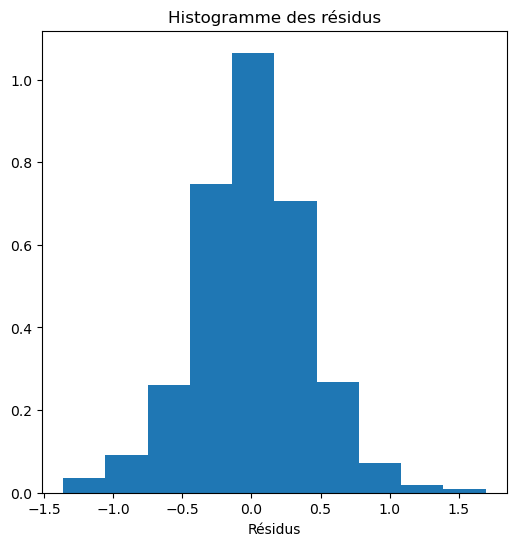

In [30]:
df_res=data_Null.copy()
df_res['residu_s'] = reg_multi.resid
plt.figure(figsize=(6,6))
plt.hist(df_res['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

L’allure de l’histogramme est assez sysmetrique.

Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

In [31]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9935745596885681, pvalue=5.671638973581139e-06)

Ici, l'hypothèse de normalité est remise en cause (p-value = 5.67e-06 < 0.05).

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien.

### Test de l’homoscédasticité

On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [32]:
import statsmodels.stats.api as sms

# Supposons que reg_multi est votre modèle de régression multiple

# Récupérer les résidus du modèle
residuals = reg_multi.resid

# Construire la matrice exogène pour le test de Breusch-Pagan
exog_het = reg_multi.model.data.frame[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']]

# Ajouter une colonne constante à la matrice exogène
exog_het = sm.add_constant(exog_het)

# Appliquer le test de Breusch-Pagan
bp_test = sms.het_breuschpagan(residuals, exog_het=exog_het)

# Afficher les résultats
print('Test de Breusch-Pagan:')
print(f'LM Statistic: {bp_test[0]}')
print(f'LM P-Value: {bp_test[1]}')
print(f'F-Statistic: {bp_test[2]}')
print(f'F P-Value: {bp_test[3]}')

# Interprétation
if bp_test[1] < 0.05:
    print('Rejet de l\'hypothèse nulle. Il y a des signes d\'hétéroscédasticité.')
else:
    print('Pas de preuve significative d\'hétéroscédasticité.')



Test de Breusch-Pagan:
LM Statistic: 164.6597687524693
LM P-Value: 6.098452163335932e-33
F-Statistic: 30.775783000171042
F P-Value: 6.11040412097926e-35
Rejet de l'hypothèse nulle. Il y a des signes d'hétéroscédasticité.


Dans le cas d’un “grand échantillon”,
les propriétés asymptotiques des estimateurs corrigent un manque “raisonnable” de normalité des résidus : le modèle linéaire est dit robuste vis à vis de cette hypothèse.

Pour plus de détails sur ce sujet on peut se referrer vers ce lien : [Là](http://perso.ens-lyon.fr/lise.vaudor/non-respect-des-hypotheses-du-modele-lineaire-anova-regression-cest-grave-docteur/) 


### Analyse des resultats

Nous allons ici réaliser les tests à un niveau α = 5% :

In [33]:
alpha = 0.05
n = data_Null['margin_low'].count() 
p = 6

Nous allons mener des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appelé  analyses  .

In [34]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

### Calcul des leviers (Analysez l'atypicité des observations)

On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de $2∗\frac{p}{n}$.

In [35]:
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag
seuil_levier = 2*p/n

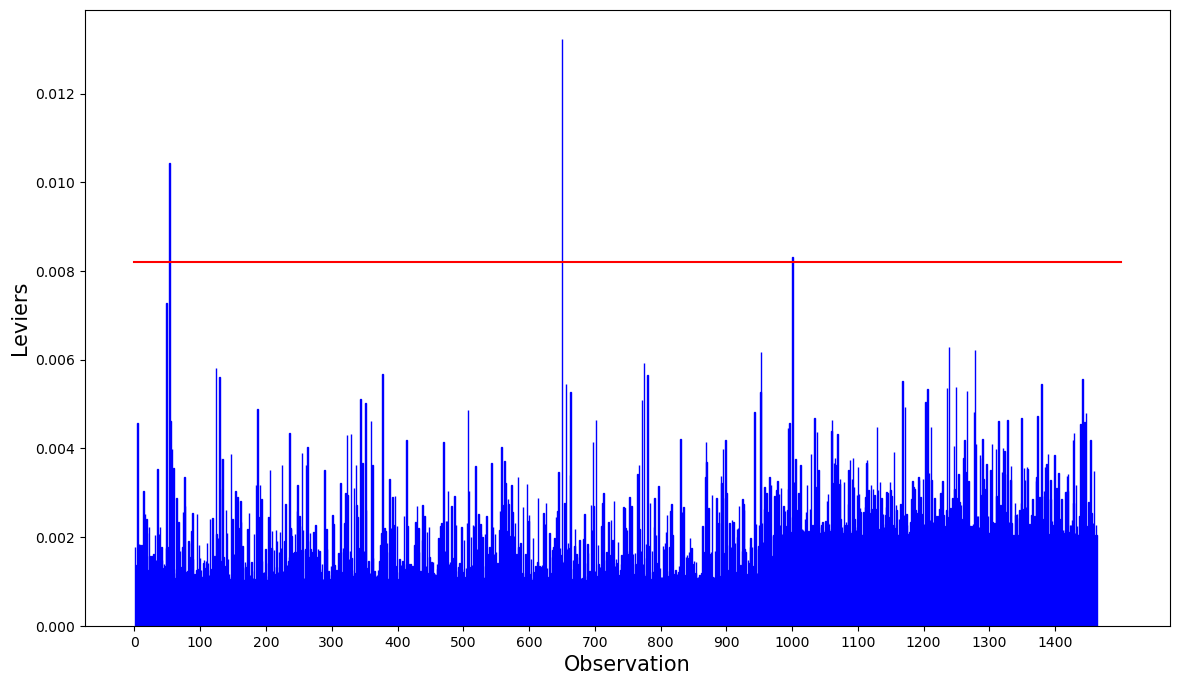

In [36]:
plt.figure(figsize=(14,8))
plt.bar(analyses['obs'], analyses['levier'], edgecolor='blue')
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation', fontsize=15)
plt.ylabel('Leviers', fontsize=15)
plt.plot([0, 1500], [seuil_levier, seuil_levier], color='r')
plt.show()

Pour sélectionner les points pour lesquels le levier est supérieur au seuil, on exécute la ligne suivante :

In [37]:
analyses.loc[analyses['levier'] > seuil_levier, :]

,obs,levier
52,53,0.010439
649,650,0.013231
1000,1001,0.008309


En pratique, on ne retire que les observations atypiques ET influentes.

### Calcul des résidus studentisés

Si l'on souhaite maintenant calculer les résidus studentisés :

Nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

In [38]:
from scipy.stats import t
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)


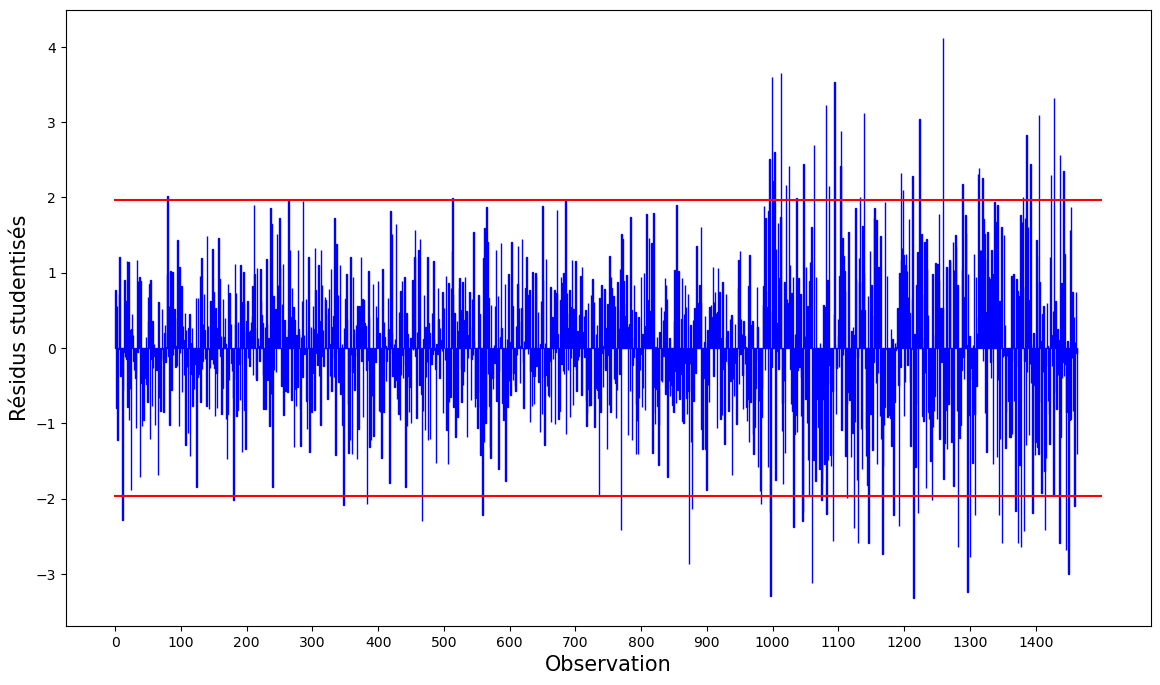

In [39]:
plt.figure(figsize=(14,8))
plt.bar(analyses['obs'], analyses['rstudent'],edgecolor='blue')
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation', fontsize=15)
plt.ylabel('Résidus studentisés', fontsize=15)
plt.plot([0, 1500], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1500], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

### Distance de Cook (Analysez l'influence des observations)

Pour trouver la distance de Cook, nous exécutons ceci :

In [40]:
influence = reg_multi.get_influence().summary_frame()

Le seuil de la distance de Cook est de n-p :

In [41]:
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

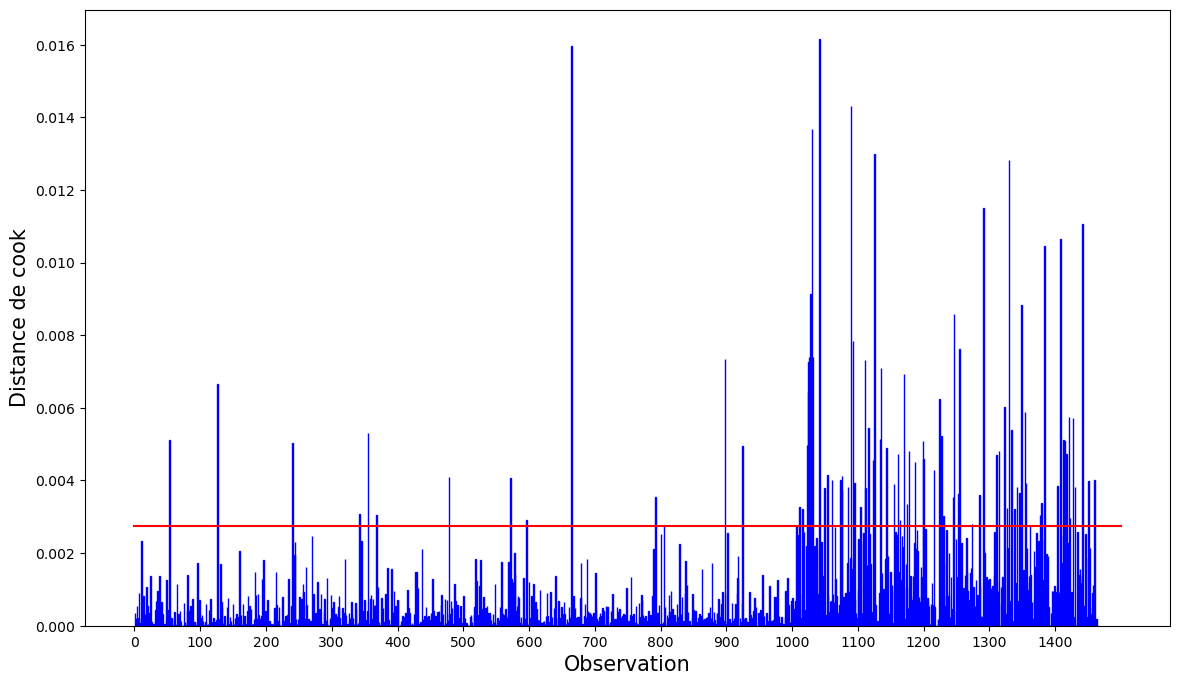

In [42]:
plt.figure(figsize=(14,8))
plt.bar(analyses['obs'], analyses['dcooks'], edgecolor='blue')
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation', fontsize=15)
plt.ylabel('Distance de cook', fontsize=15)
plt.plot([0, 1500], [seuil_dcook, seuil_dcook], color='r')
plt.show()

In [43]:
analyses.loc[analyses['dcooks'] > seuil_dcook, :]

,obs,levier,rstudent,dcooks
52,53,0.010439,-1.206175,0.005116
125,126,0.001208,0.663381,0.006647
239,240,0.001639,-0.234538,0.005032
341,342,0.001761,1.101902,0.003087
354,355,0.001144,-1.397065,0.005301
...,...,...,...,...
1426,1427,0.004196,-1.951369,0.005717
1429,1430,0.002084,0.625220,0.003808
1441,1442,0.005557,2.353416,0.011060
1450,1451,0.002788,-0.953010,0.003984


### Amélioration du modèle

In [44]:
atypiques = analyses.loc[analyses['levier'] > seuil_levier, :]
influents =analyses.loc[analyses['dcooks'] > seuil_dcook, :]

In [45]:
atypiques_influents = influents.merge(atypiques, how = 'inner' )
atypiques_influents

,obs,levier,rstudent,dcooks
0,53,0.010439,-1.206175,0.005116


Ligne 52 influentes et atypiques également, nous pouvons la conserver.

### Imputation des valeurs manquantes

In [46]:
import statsmodels.api as sm

# Sélectionner les lignes avec des valeurs manquantes dans 'margin_low'
nan_rows = billets[billets['margin_low'].isnull()]

# Sélectionner uniquement les variables indépendantes pour ces lignes
nan_data = nan_rows[['is_genuine', 'height_left', 'margin_up']]

# Ajouter une constante aux données NaN
nan_data = sm.add_constant(nan_data)

# Utiliser le modèle pour faire des prédictions
predictions = reg_multi.predict(nan_data)

print(predictions)


72      4.070783
99      4.104309
151     4.114361
197     3.979364
241     4.133697
251     4.098470
284     4.071605
334     4.112908
410     4.088638
413     4.076757
445     4.151739
481     4.164640
505     4.132498
611     4.048253
654     4.175857
675     4.214598
710     4.113443
739     4.096128
742     4.082568
780     4.099602
798     4.118753
844     4.140049
845     4.163086
871     4.119130
895     4.116005
919     4.200695
945     4.110948
946     4.065411
981     4.145168
1076    5.250466
1121    5.265191
1176    5.278182
1303    5.322261
1315    5.203414
1347    5.176582
1435    5.179775
1438    5.244683
dtype: float64


In [47]:
# Créer une copie du DataFrame original
df = billets.copy()

# Remplacer les valeurs manquantes dans 'margin_low' par les prédictions
df.loc[df['margin_low'].isnull(), 'margin_low'] = predictions

# Afficher les informations sur le nouveau DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int32  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 76.3 KB


Les valeurs manquantes ont bien été remplacées.

## 3. Analyse en composantes principales (ACP)

### Préparation des données

In [48]:
DF = df.drop(columns= ['is_genuine'])
X = DF.values 
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_cr = std_scale.transform(X)

### Eboulis des valeurs propres

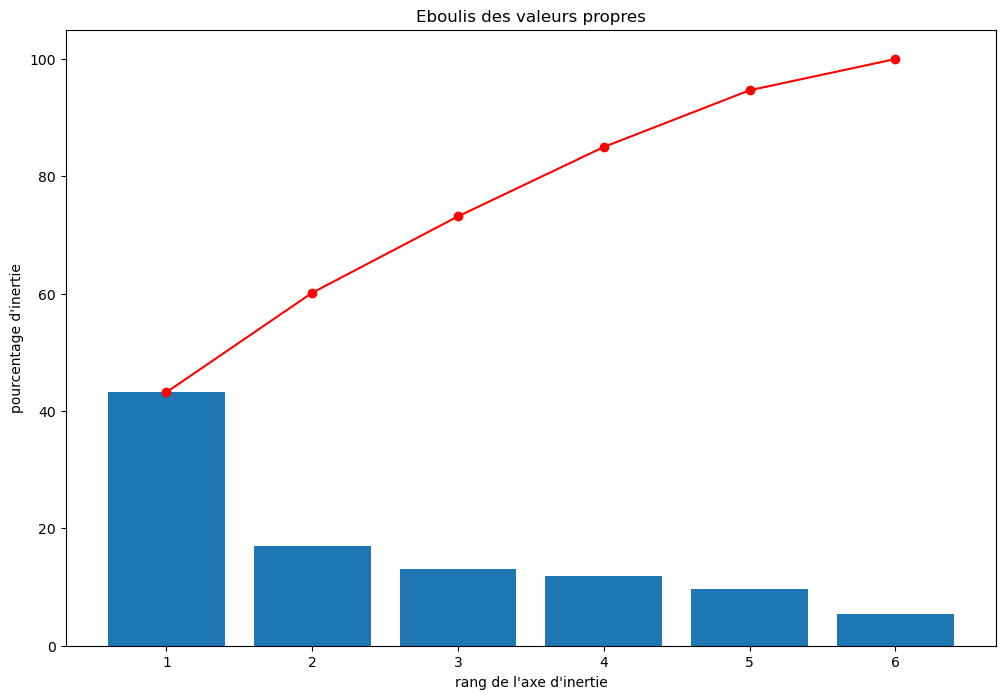

In [49]:
pca = decomposition.PCA().fit(X_cr) #sklearn
varexpl = pca.explained_variance_ratio_*100
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [50]:
print(varexpl)

[43.20991135 16.95662162 13.01889584 11.82489513  9.66492449  5.32475157]


In [51]:
scree_cum = varexpl.cumsum().round()
scree_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

### Composantes principales

In [52]:
#la matrice de corrélation

t=pca.components_[:]
df_corr_comp = pd.DataFrame(t,index = ['F1', 'F2', 'F3','F4','F5','F6'],columns=DF.columns)
df_corr_comp.head(6).round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,-0.08,0.33,0.39,0.51,0.44,-0.53
F2,0.94,0.31,0.11,-0.07,-0.00,0.05
F3,-0.29,0.88,-0.17,-0.11,-0.27,0.15
F4,-0.10,-0.05,0.87,-0.09,-0.44,0.18
F5,-0.12,0.10,0.23,-0.57,0.71,0.30
F6,0.01,0.01,0.00,0.63,0.18,0.76


Observation :

Les 2 premières composantes représente 60% de l'inertie total nous allons donc nous concentrer sur **F1/F2**

In [53]:
def cerle_corr(t, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            #fig, ax = plt.subplots(figsize=(12,(n_comp*2)))
            #ax.set_aspect('equal', adjustable='box')
            fig=plt.figure(figsize=(12,12))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box')

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            else :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
        
            # affichage des flèches
            plt.quiver(np.zeros(t.shape[1]), np.zeros(t.shape[1]),
                   t[d1,:], t[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(t[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

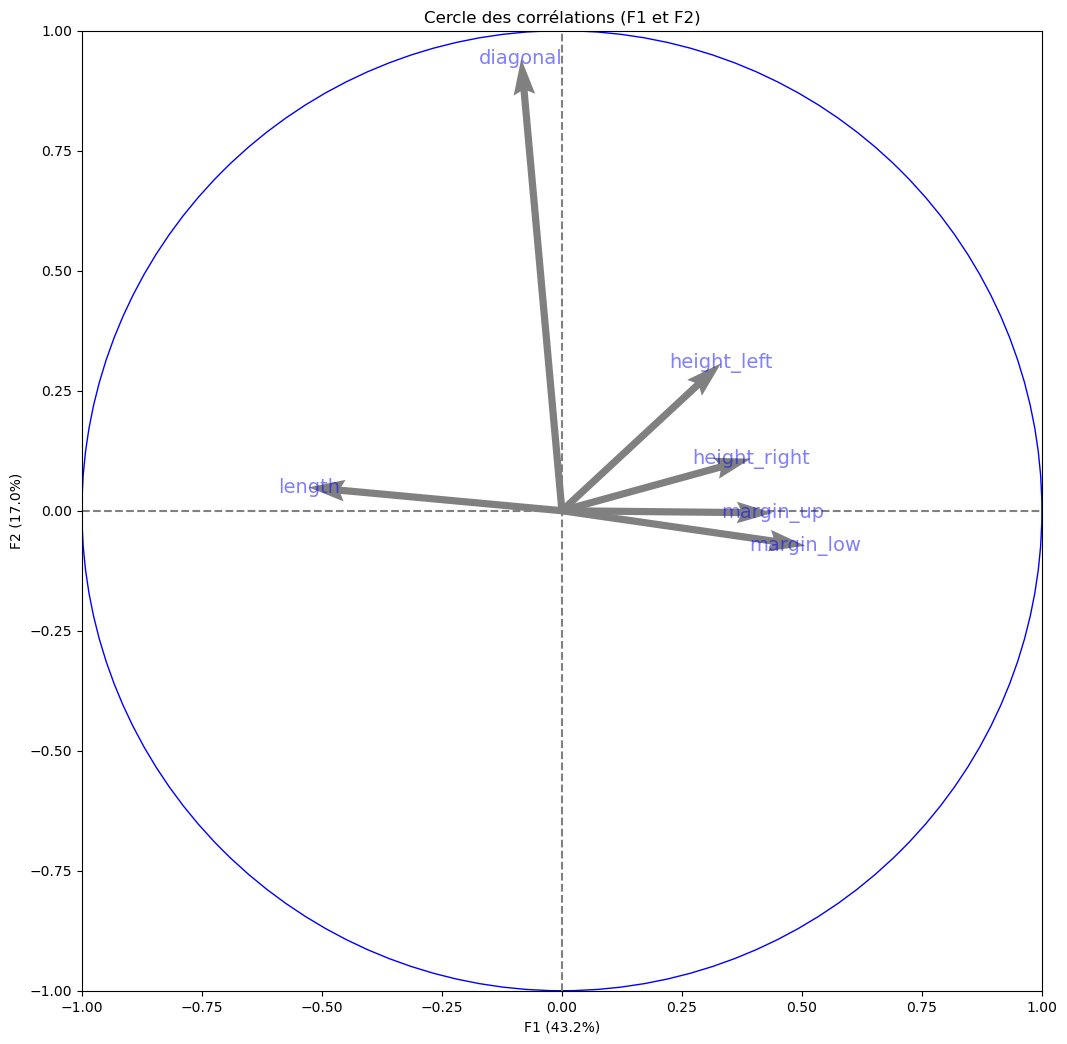

In [54]:
cerle_corr(t, 4, pca, [(0,1)], labels = np.array(DF.columns))

#### Observation:

#### Les variables les plus corrélées positivement à F1 sont 'height' et 'margin'
#### Les variables les plus corrélées négativement à F1 est 'length'
#### Les variables les plus corrélées positivement à F2 est 'diagonal'

In [55]:
# Affichage sur plusieurs plans factoriels avec inertie des axes.
def plot_plans_factoriels(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, centroid=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
         
            
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des {} individus sur F{} et F{}".format(X_projected.shape[0], d1+1, d2+1), fontsize=22)
            plt.show(block=False)

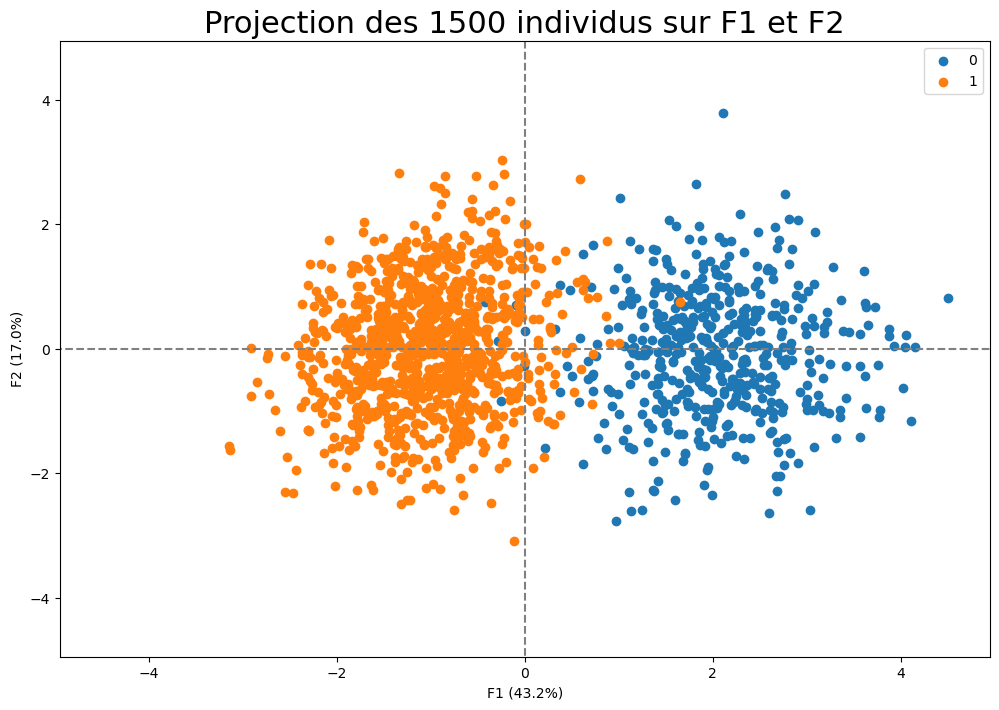

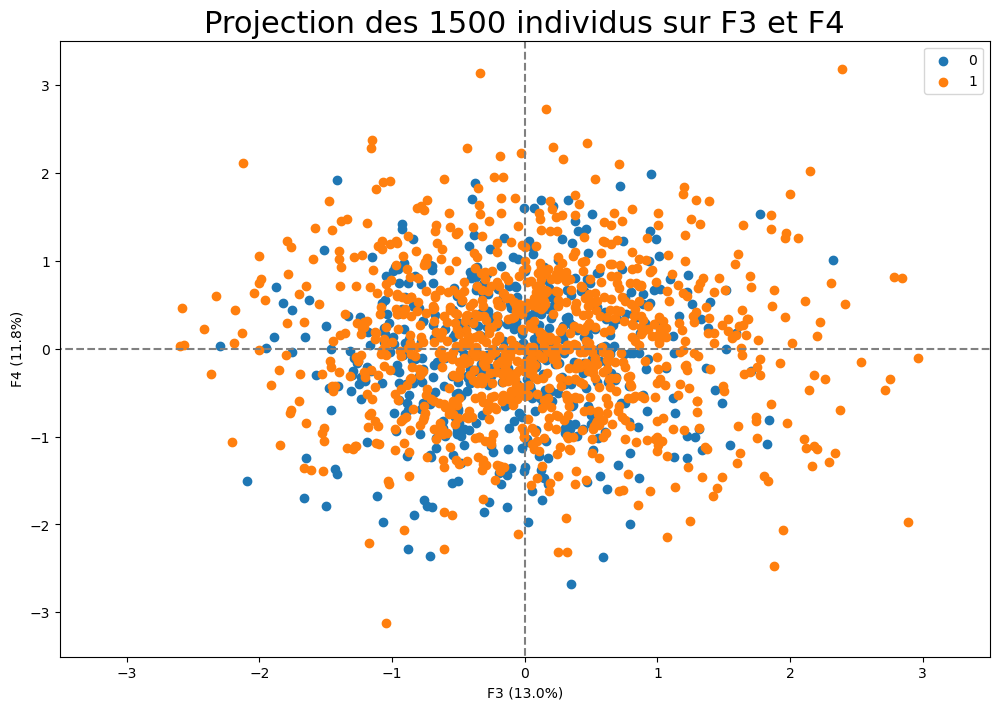

In [56]:
X_projected = pca.transform(X_cr)
plot_plans_factoriels(X_projected, 4, pca, [(0,1),(2,3)], illustrative_var = df["is_genuine"])

#### Observation:

#### On voit bien une séparation des indivudus en fonction de 'is_genuine' sur les axes F1/F2
#### Sur F3/F4 le resultat est trop homogène ce qui confirme de se concentré uniquement sur les 2 premières composantes

## 4 . Programmation des algorithmes de classification

### Algorithme de reconnaissance des faux billets

Le but de ce projet est construire des algorithmes capables de faire des classifications automatiques en vue de partitionner les données(billets de banque) en vrais ou faux billets. Pour ce faire, nous allons construire trois algorithmes: le premier basé sur la regression logistique le second sur le kmean et nous terminerons sur ALGORITHME k-NN (k Nearest Neighbors)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int32  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 76.3 KB


### Preparation des données

Pour exploiter correctement les données :

S’il y en a beaucoup, on travaille d'abord uniquement avec un échantillon représentatif pour pouvoir aller plus vite.

On sépare dès le départ en deux parties notre jeu de données : un training set pour créer le modèle et un testing set pour tester la qualité du modèle.

Le training set, qui va nous permettre d’entraîner notre modèle et sera utilisé par l’algorithme d’apprentissage.

In [58]:
X = df.drop(['is_genuine'], axis=1)
y = df['is_genuine']

### Séparer training / testing set


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)

## 4.2 Algorythme K-Mean

K-Means est un algorithme simple d’apprentissage non supervisé utilisé pour résoudre les problèmes de clustering. Il suit une procédure simple, consistant à classer un ensemble de données dans un nombre de clusters, défini par la lettre « k« , qui est fixé au préalable.

L’algorithme associe chaque donnée à son centroïde le plus proche, afin de créer des cluster.

On positionne ensuite les clusters comme des points. On associe tous les observations ou points de données au cluster le plus proche, calculés et ajustés. Puis, le processus recommence en utilisant les nouveaux ajustements jusqu’à ce qu’un résultat souhaité soit atteint.

![k-mean.png](k-mean.png)

### Méthode du coude
Pour déterminer le nombre de clusters à étudier, on s'intéresse au graphique qui trace l'inertie intraclasse en fonction du nombre de clusters. On cherche plus particulièrement une "cassure" dans la courbe.

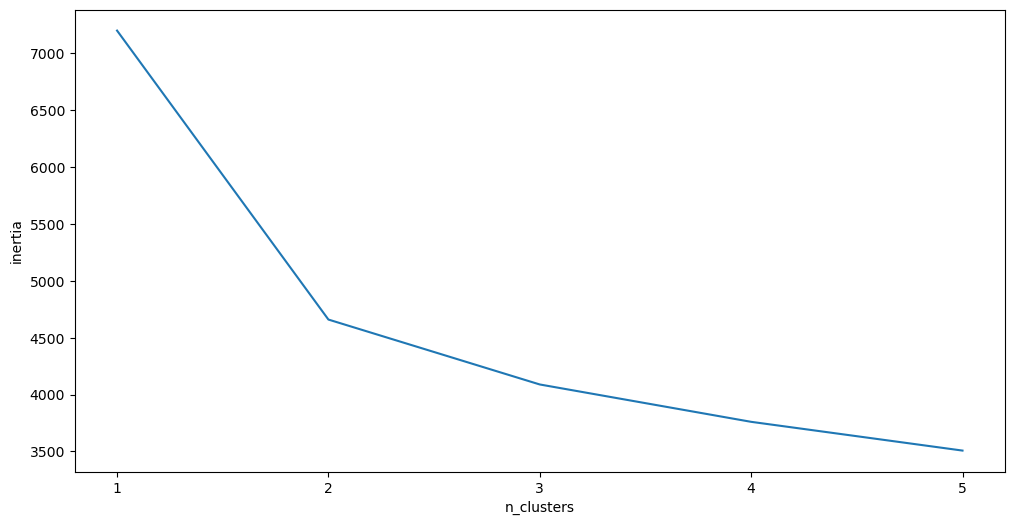

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

inertia = []
k_list = range(1, 6)

for i in k_list:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train_scaled) 
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_ylabel("inertia")
ax.set_xlabel("n_clusters")

plt.plot(k_list, inertia)

plt.xticks(range(1, 6))

plt.show()



La méthode du coude nous donne le nombre de cluster optimale cependant on sait déja qu'on a deux groupes de billets, mais cela confirme l'exitance de deux groupes distincts.

### Création de modèle K-means

In [61]:
kmeans = KMeans(n_clusters=2, random_state=11)
x_Kmeans = kmeans.fit_transform(X_train)

* Attribution des clusters

In [62]:
# Ajout d'une colonne contenant le cluster attribue:
clusters_km = kmeans.labels_
centroids_km = kmeans.cluster_centers_

In [63]:
# Nombre d'individus par groupes
pd.Series(clusters_km).value_counts()

1    823
0    377
dtype: int64

* Centroides

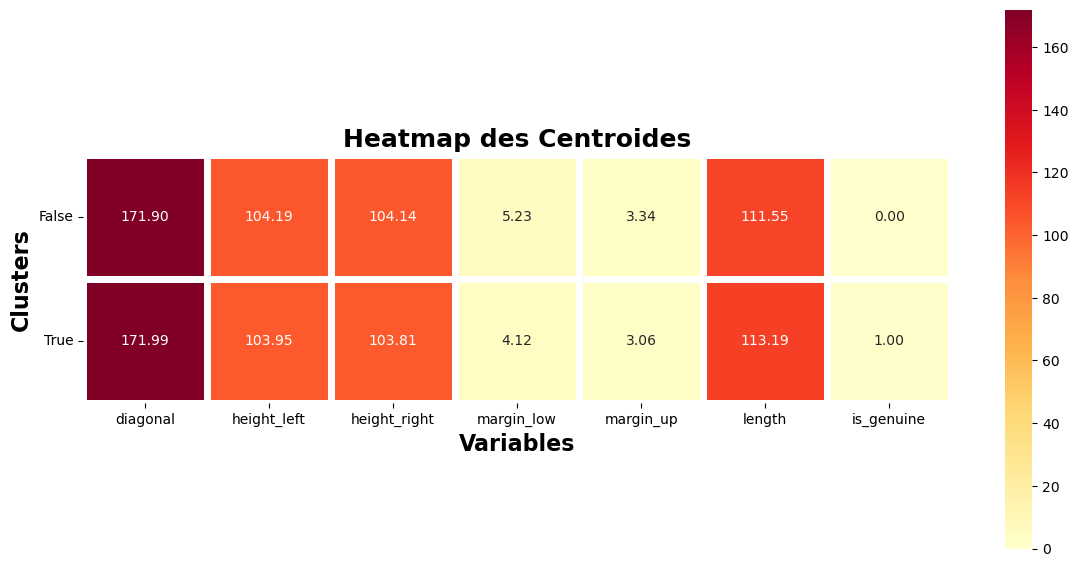

In [64]:
# Création d'un DataFrame avec les centroides
billets_centroid_df = pd.DataFrame(centroids_km, columns=X_train.columns)

# Création d'une colonne 'is_genuine' dans le DataFrame des centroides
billets_centroid_df['is_genuine'] = [y_train.iloc[clusters_km == i].mode().iloc[0] for i in range(len(set(clusters_km)))]

# Création d'une colonne 'is_genuine' dans le DataFrame de test
X_test_clusters = kmeans.transform(X_test)
test_clusters = kmeans.predict(X_test)
billets_test_df = pd.DataFrame(X_test_clusters, columns=['Cluster 0', 'Cluster 1'])
billets_test_df['is_genuine'] = y_test.reset_index(drop=True)

# Transformation des valeurs 0 et 1 en False et True
billets_centroid_df['is_genuine'] = billets_centroid_df['is_genuine'].map({0: False, 1: True})
billets_test_df['is_genuine'] = billets_test_df['is_genuine'].map({0: False, 1: True})

# Convertir les valeurs de 'is_genuine' en 0 et 1
billets_centroid_df['is_genuine'] = billets_centroid_df['is_genuine'].astype(int)
billets_test_df['is_genuine'] = billets_test_df['is_genuine'].astype(int)

# Création du heatmap
fig, ax = plt.subplots(figsize=(14, 14))
heatmap = sns.heatmap(billets_centroid_df, linewidth=5, annot=True, fmt='.2f', cmap="YlOrRd", cbar_kws={"shrink": 0.5}, square=True)
plt.ylabel("Clusters", weight='bold', size=16)
plt.xlabel("Variables", weight='bold', size=16)
plt.title("Heatmap des Centroides", weight='bold', size=18)

# Modification des étiquettes des axes
heatmap.set_yticklabels(['False', 'True'], rotation=0)
plt.show()




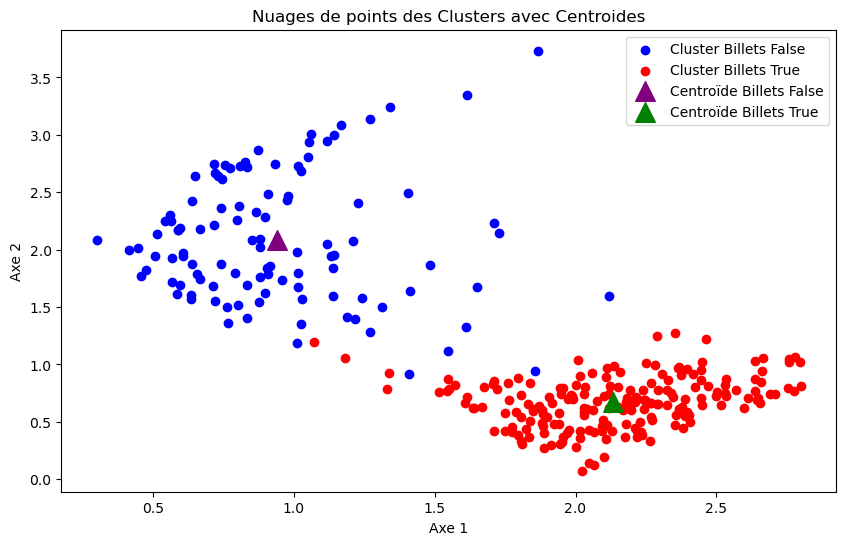

In [65]:
# Création d'un DataFrame avec les données et les clusters
billets_combined_df = pd.concat([billets_test_df, billets_centroid_df])

# Scatter plot des nuages de points des clusters avec les centroides
fig, ax = plt.subplots(figsize=(10, 6))

# Nuages de points pour le Cluster 0 (False)
ax.scatter(billets_combined_df[billets_combined_df['is_genuine'] == False]['Cluster 0'],
           billets_combined_df[billets_combined_df['is_genuine'] == False]['Cluster 1'],
           c='blue', label='Cluster Billets False')

# Nuages de points pour le Cluster 1 (True)
ax.scatter(billets_combined_df[billets_combined_df['is_genuine'] == True]['Cluster 0'],
           billets_combined_df[billets_combined_df['is_genuine'] == True]['Cluster 1'],
           c='red', label='Cluster Billets True')

# Centroides
ax.scatter(billets_combined_df[billets_combined_df['is_genuine'] == False]['Cluster 0'].mean(),
           billets_combined_df[billets_combined_df['is_genuine'] == False]['Cluster 1'].mean(),
           marker='^', c='purple', s=200, label='Centroïde Billets False')

ax.scatter(billets_combined_df[billets_combined_df['is_genuine'] == True]['Cluster 0'].mean(),
           billets_combined_df[billets_combined_df['is_genuine'] == True]['Cluster 1'].mean(),
           marker='^', c='green', s=200, label='Centroïde Billets True')

plt.title('Nuages de points des Clusters avec Centroides')
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
plt.legend()
plt.show()



### Matrice de confusion (K-means)

In [66]:
production_kmean = kmeans.predict(X_test)

In [67]:
km_matrix = pd.crosstab(y_test,production_kmean)

In [68]:
# Graphique:
def matriceConfusion(mc,titre) :
    plt.figure(figsize=(8,5))
    sns.heatmap(mc, annot = True, fmt = ".3g",
                cmap = sns.color_palette("crest", as_cmap=True),
                linecolor = "white", linewidths = 0.3,
                xticklabels = ["Faux","Vrai"],
                yticklabels=["0(Faux)","1(Vrai)"]
                , annot_kws={"size":20})
    plt.xlabel("Prédictions", fontsize=15)
    plt.ylabel("Réalité",fontsize=15)
    plt.title(titre,fontsize=20)
    plt.show()

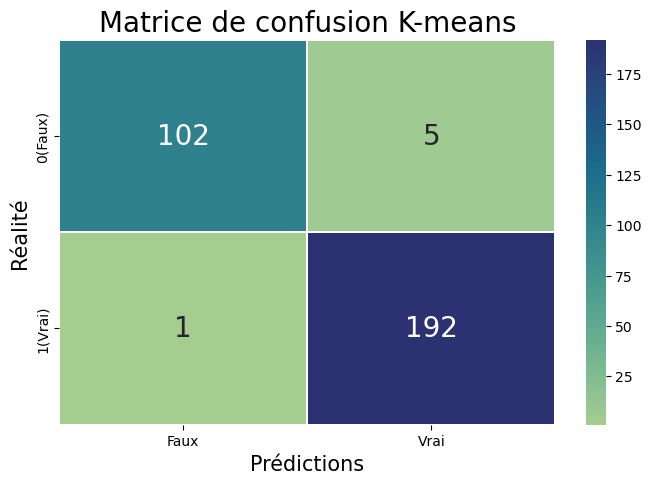

In [69]:
matriceConfusion(km_matrix,'Matrice de confusion K-means')

In [70]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,production_kmean))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       107
           1       0.97      0.99      0.98       193

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.98       300
weighted avg       0.98      0.98      0.98       300



In [71]:
# Model Precision
Precision_kmeans=metrics.precision_score(y_test,production_kmean)
print("Precision:",(Precision_kmeans).round(3))

# Model Recall
print("Recall:",(metrics.recall_score(y_test,production_kmean)).round(3))

Precision: 0.975
Recall: 0.995


In [72]:
# Predictions sur des donnees inconnues:
billets_production = pd.read_csv("billets_production.csv")
billets_production_test = billets_production.drop('id', axis=1)

billets_production["Prédiction K-means"] = kmeans.predict(billets_production_test)
billets_production['Prédiction K-means'].replace([1,0],[True,False], inplace=True)
display(billets_production[["id","Prédiction K-means"]])

,id,Prédiction K-means
0,A_1,False
1,A_2,False
2,A_3,False
3,A_4,True
4,A_5,True


### Creation de la fonction KMEAN

In [73]:
import pandas as pd
from sklearn.cluster import KMeans

def predict_with_kmeans(new_data, kmeans_model, centroids):
    # Drop the 'id' column if it is present
    if 'id' in new_data.columns:
        new_data = new_data.drop('id', axis=1)

    # Transforme les nouvelles données en utilisant le modèle K-means
    new_data_clusters = kmeans_model.transform(new_data)

    # Prédit les étiquettes de cluster pour les nouvelles données
    new_data_predictions = kmeans_model.predict(new_data)

    # Crée un DataFrame avec les centroïdes et les étiquettes de cluster associées
    centroids_df = pd.DataFrame(centroids, columns=new_data.columns)
    centroids_df['Cluster'] = range(len(centroids_df))

    # Crée une colonne 'is_genuine' dans le DataFrame des centroides
    centroids_df['is_genuine'] = [y_train.iloc[clusters_km == i].mode().iloc[0] for i in range(len(set(clusters_km)))]

    # Mappe les étiquettes de cluster prédites aux étiquettes de cluster associées aux centroïdes
    predictions = pd.Series(new_data_predictions).map(centroids_df.set_index('Cluster')['is_genuine'])

    return predictions

# Chargez le DataFrame billets_examen
billets_examen = pd.read_csv("billets_production.csv") 

# Utilisez la fonction predict_with_kmeans pour obtenir les prédictions
predictions_examen = predict_with_kmeans(billets_examen, kmeans, centroids_km)

# Ajoutez les prédictions au DataFrame billets_examen
billets_examen["Prédiction K-means"] = predictions_examen

# Remplacez les étiquettes de cluster par des valeurs booléennes (True: 1, False: 0)
billets_examen['Prédiction K-means'].replace({0: False, 1: True}, inplace=True)

# Affichez les résultats avec les ID des billets
display(billets_examen[["id", "Prédiction K-means"]])


,id,Prédiction K-means
0,A_1,False
1,A_2,False
2,A_3,False
3,A_4,True
4,A_5,True


### Création de l'algorithme de la régression logistique

Un modèle de régression logistique permet aussi de prédire la probabilité qu’un événement arrive (valeur de 1) ou non (valeur de 0) à partir de l’optimisation des coefficients de régression. Ce résultat varie toujours entre 0 et 1. Lorsque la valeur prédite est supérieure à un seuil, l’événement est susceptible de se produire, alors que lorsque cette valeur est inférieure au même seuil, il ne l’est pas.

La régression logistique est une méthode de classification (supervisée) qui permet de traiter des cas comme :

la prévision de présence/absence d'une maladie ;

la prévision de l'état de fonctionnement d'une machine-outil en fonction de ses caractéristiques (ancienneté, modèle, etc.), à des fins de maintenance prédictive ;

le credit scoring (attribution ou non d'un crédit).

### Justification de l'utilisation de la régression logistique

#### La justification d'une régression logistique pour la prédiction de vrais ou faux billets dans un jeu de données basé sur les dimensions des billets peut reposer sur plusieurs points. Voici quelques éléments que vous pouvez mentionner dans votre justification :

#### 1. Nature de la variable dépendante :

#### La variable que vous essayez de prédire, à savoir "vrai" ou "faux" billet, est une variable binaire. La régression logistique est particulièrement adaptée pour modéliser des réponses binaires.

#### 2. Type de modèle approprié :

#### La régression logistique est conçue spécifiquement pour les problèmes de classification binaire. Elle modélise la probabilité de succès (dans votre cas, un vrai billet) en fonction des variables explicatives.

#### 3. Interprétabilité des coefficients :

#### Les coefficients de la régression logistique peuvent être interprétés comme des log-rapports de cotes. Cela signifie que vous pouvez comprendre comment chaque variable explicative contribue à augmenter ou diminuer les chances de prédire un vrai billet par rapport à un faux billet.

#### 4. Relation non linéaire :

#### Si la relation entre vos variables explicatives et la probabilité d'un vrai billet n'est pas linéaire, la régression logistique peut encore être adaptée en utilisant des termes polynomiaux ou d'autres transformations.

#### 5. Facilité d'implémentation et de compréhension :

#### La régression logistique est relativement simple à mettre en œuvre et à comprendre par rapport à certains autres modèles de machine learning plus complexes. Cela peut être un avantage si la simplicité et l'interprétabilité sont des critères importants pour votre application.

#### 6. Résultats du modèle initial :

#### Si vous avez déjà ajusté un modèle initial de régression logistique et que ses performances sont satisfaisantes en termes de métriques d'évaluation (comme la précision, le rappel, la F1-score, etc.), cela renforce la justification de l'utilisation de ce modèle.

#### 7. Distribution des résidus :

#### Vous pouvez examiner la distribution des résidus pour vérifier si le modèle de régression logistique est approprié. Des résidus bien distribués peuvent indiquer que le modèle capte bien les schémas dans les données.

### En résumé, la régression logistique est justifiée dans notre cas en raison de la nature binaire de notre variable dépendante, de sa facilité d'interprétation et de son adaptation aux problèmes de classification.

In [74]:
# Rebuild datasets
dataset_train = pd.concat((X_train, y_train), axis=1).reset_index(drop=True)
dataset_test = pd.concat((X_test, y_test), axis=1).reset_index(drop=True)

In [75]:
reg_log_multi = smf.glm('is_genuine ~ diagonal+height_left+height_right+margin_low+margin_up+length', data=dataset_train, family=sm.families.Binomial()).fit()
print(reg_log_multi.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1193
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29.117
Date:                Wed, 01 Nov 2023   Deviance:                       58.234
Time:                        14:57:27   Pearson chi2:                 4.14e+03
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7037
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -188.0712    290.214     -0.648   

Retrait des variables non significatives

On va donc maintenant retirer les variables non significatives avec la procédure descendante ou backward une par une.

In [76]:
reg_log_multi = smf.glm('is_genuine ~ height_left+height_right+margin_low+margin_up+length', data=dataset_train, family=sm.families.Binomial(), random_state=11).fit()
print(reg_log_multi.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29.181
Date:                Wed, 01 Nov 2023   Deviance:                       58.361
Time:                        14:57:34   Pearson chi2:                 3.93e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7036
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -268.2021    185.656     -1.445   

In [77]:
reg_log_multi = smf.glm('is_genuine ~ height_right+margin_low+margin_up+length', data=dataset_train, family=sm.families.Binomial(), random_state=11).fit()
print(reg_log_multi.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1195
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29.739
Date:                Wed, 01 Nov 2023   Deviance:                       59.478
Time:                        14:57:34   Pearson chi2:                 4.73e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7034
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -371.9257    164.775     -2.257   

In [78]:
# notre algorithme predit las faux billets
dataset_test["proba"] = (reg_log_multi.predict(dataset_test)).round(4)
dataset_test["y_pred"] = reg_log_multi.predict(dataset_test) >= 0.5
mtr_conf_reg=pd.crosstab(dataset_test['is_genuine'],dataset_test["y_pred"])

In [79]:
# Graphique:
def matriceConfusion(mc,titre) :
    plt.figure(figsize=(8,5))
    sns.heatmap(mc, annot = True, fmt = ".3g",
                cmap = sns.color_palette("crest", as_cmap=True),
                linecolor = "white", linewidths = 0.3,
                xticklabels = ["Faux","Vrai"],
                yticklabels=["0(Faux)","1(Vrai)"]
                , annot_kws={"size":20})
    plt.xlabel("Prédictions", fontsize=15)
    plt.ylabel("Réalité",fontsize=15)
    plt.title(titre,fontsize=20)
    plt.show()

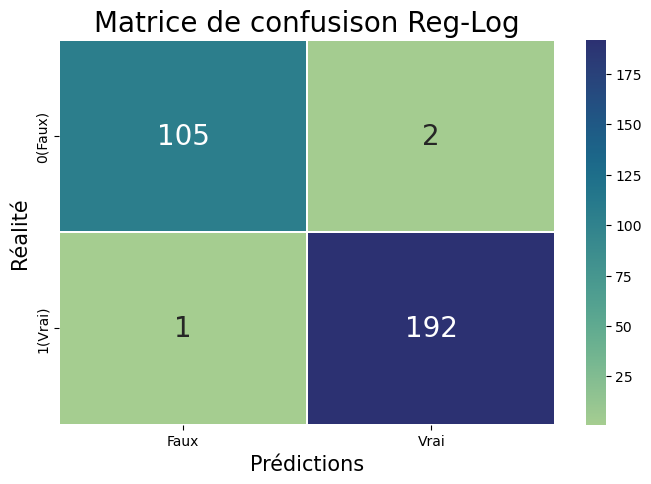

In [80]:
matriceConfusion(mtr_conf_reg,'Matrice de confusison Reg-Log')

In [81]:
# Classification report
target_names = ['Faux Billets', 'Vrai Billets']
print(classification_report(dataset_test['is_genuine'],dataset_test["y_pred"], target_names=target_names))


              precision    recall  f1-score   support

Faux Billets       0.99      0.98      0.99       107
Vrai Billets       0.99      0.99      0.99       193

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [82]:
# Model Precision
Precision_reg=metrics.precision_score(dataset_test['is_genuine'],dataset_test["y_pred"])
print("Precision:",Precision_reg)

# Model Recall
print("Recall:",metrics.recall_score(dataset_test['is_genuine'],dataset_test["y_pred"]))

Precision: 0.9896907216494846
Recall: 0.9948186528497409


### Création de de la fonction de l'algorithme de la régression logistique

In [83]:
import statsmodels.api as sm

def predict_logistic_regression(model, new_data):
    
    # Ajoute une constante aux nouvelles données (si le modèle l'inclut)
    new_data_with_const = sm.add_constant(new_data) if 'const' in model.model.exog_names else new_data

    # Prédit les probabilités
    predicted_probabilities = model.predict(new_data_with_const).round(4)

    # Crée un DataFrame avec les prédictions
    predictions = pd.DataFrame({
        'proba': predicted_probabilities,
        'y_pred': predicted_probabilities >= 0.5
    })

    return predictions

# Chargez le DataFrame billets_examen
billets_examen = pd.read_csv("billets_production.csv") 

# En supposant que 'new_data' est votre nouveau jeu de données pour les tests
predictions_exam = predict_logistic_regression(reg_log_multi, billets_examen)

# Ajoute la colonne 'id' aux résultats
predictions_exam['id'] = billets_examen['id']

# Affiche les résultats avec la colonne 'id'
print(predictions_exam)


    proba  y_pred   id
0  0.0000   False  A_1
1  0.0000   False  A_2
2  0.0000   False  A_3
3  0.9973    True  A_4
4  1.0000    True  A_5


## La courbe ROC (Régression logistique)

La courbe ROC (Receiver Operating Characteristic) représente la sensibilité en fonction de 1 – spécificité pour toutes les valeurs seuils possibles du marqueur étudié.

L'aire sous la courbe ROC (ou Area Under the Curve, AUC) peut être interprétée comme la probabilité. Une AUC de 0,5 (50%) indique que le marqueur est non-informatif.

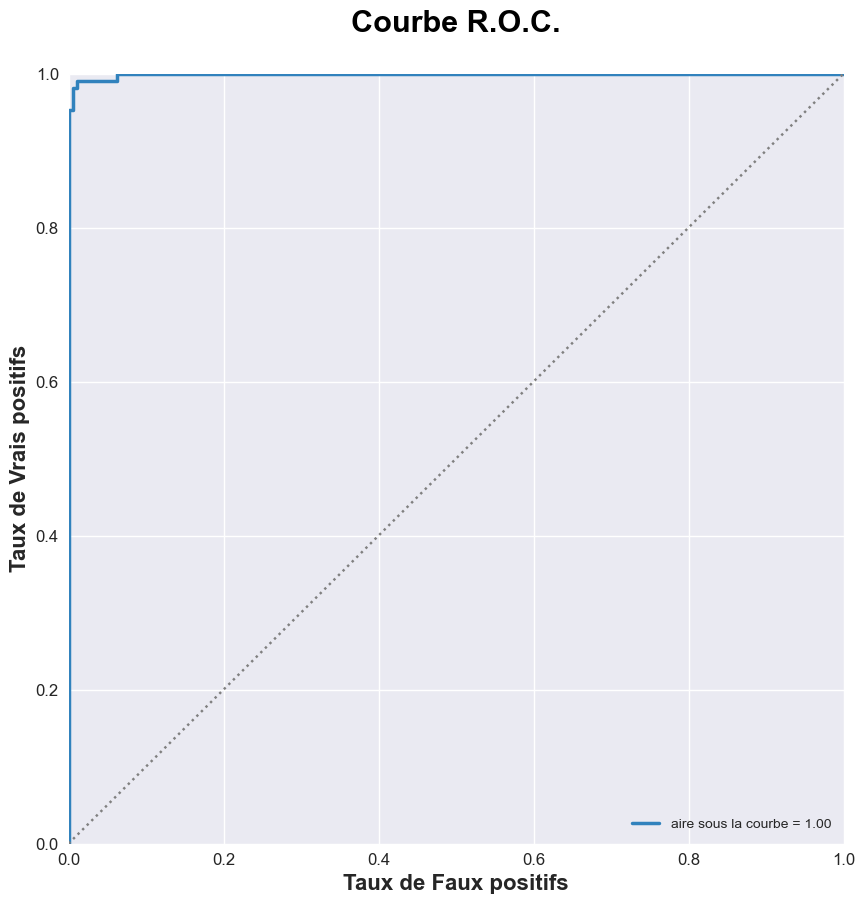

In [84]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(1 - dataset_test['is_genuine'], 1 - dataset_test["proba"])
roc_auc = roc_auc_score(1 - dataset_test['is_genuine'], 1 - dataset_test["proba"])

# Graphique:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Courbe R.O.C.",
             fontsize=22, weight='bold', color='Black', loc='center', pad=30)
plt.box(True)

plt.plot(fpr, tpr, color="#3182bd", linewidth=2.5, label="aire sous la courbe = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], color="grey", linestyle=":")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.ylabel("Taux de Vrais positifs", weight='bold', size=16)
plt.xlabel("Taux de Faux positifs", weight='bold', size=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()



In [85]:
roc_auc

0.9991767953125756

## K-NN(K Nearest Neighbors)

Diminutif de K Nearest Neighbors.
C’est un algorithme qui peut servir autant pour la classification que pour la régression. Il est surnommé « nearest neighbors » car **le principe de ce modèle consiste en effet à choisir les k données les plus proches du point étudié afin d’en prédire sa valeur.**

### Choisir le nombre optimal de K

Pour trouver le k optimal, on va simplement tester le modèle pour tous les k de 1 à 15, mesurer l’erreur test et afficher la performance en fonction de k

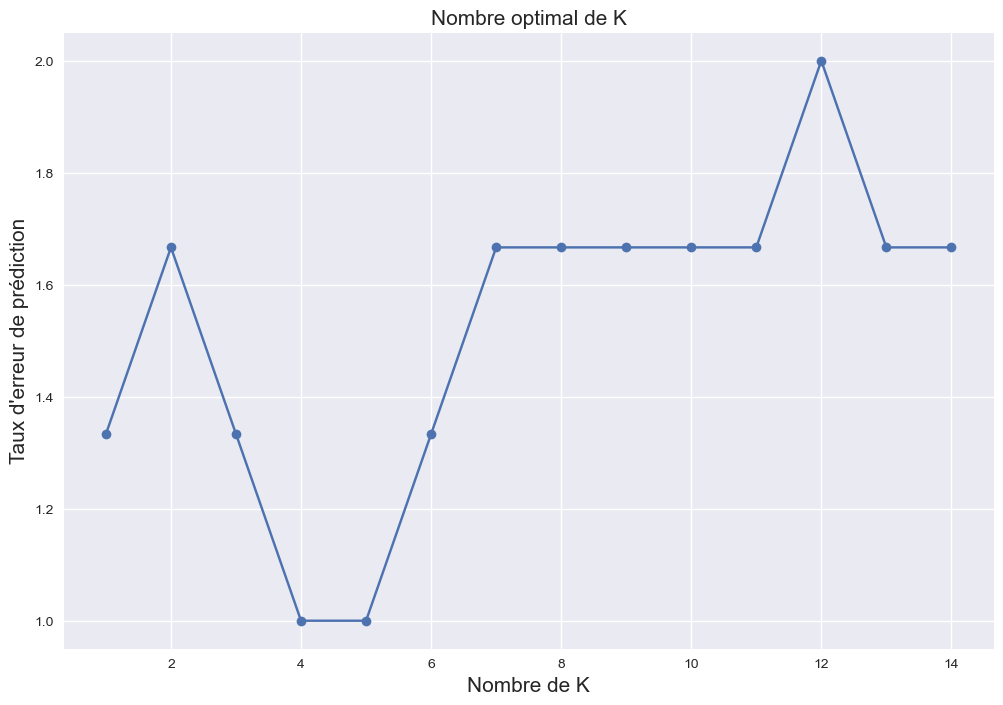

In [86]:
from sklearn import neighbors
errors = []
for k in range(1,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.figure(figsize=(12,8))
plt.plot(range(1,15), errors, 'o-')
plt.title('Nombre optimal de K',fontsize=15)
plt.ylabel("Taux d'erreur de prédiction",fontsize=15)
plt.xlabel('Nombre de K',fontsize=15)
plt.show()

In [87]:
dff = pd.DataFrame(errors, columns=['Erreur en pourcentage'])
dff['nombre de k']=range(1,15)
dff.sort_values(by='Erreur en pourcentage', ascending=True).head(5)

,Erreur en pourcentage,nombre de k
3,1.000000,4
4,1.000000,5
0,1.333333,1
2,1.333333,3
5,1.333333,6


Comme on peut le voir, le k-NN le plus performant est celui pour lequel k = 4 ou 5. On connaît donc notre classifieur final optimal : 5-nn. Ce qui veut dire que c'est celui qui classifie le mieux les données.

### Creation du modèle K-NN

In [88]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Matrice de confusion (kNN)

In [89]:
y_pred_test_NN= knn.predict(X_test)

In [90]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred_test_NN)
cnf_matrix

array([[105,   2],
       [  1, 192]], dtype=int64)

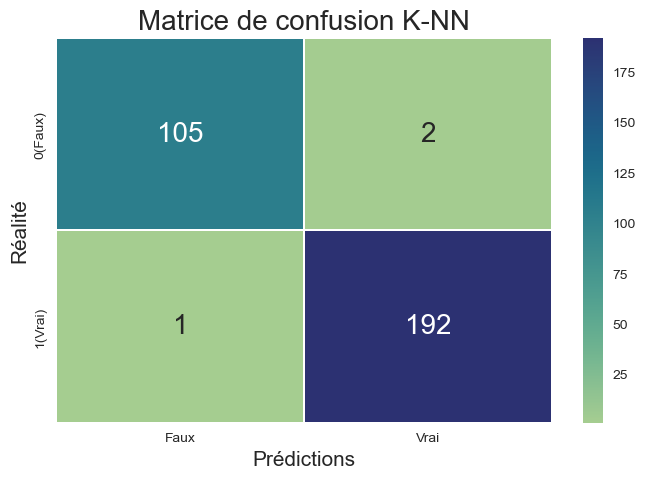

In [91]:
matriceConfusion(cnf_matrix,'Matrice de confusion K-NN')

In [92]:
# Classification report
target_names = ['Faux Billets', 'Vrai Billets']
print(classification_report(y_test,y_pred_test_NN, target_names=target_names))

              precision    recall  f1-score   support

Faux Billets       0.99      0.98      0.99       107
Vrai Billets       0.99      0.99      0.99       193

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [93]:
# Model Precision
Precision_kNN=metrics.precision_score(y_test,y_pred_test_NN)
print("Precision:",Precision_kNN)

# Model Recall
print("Recall:",metrics.recall_score(y_test,y_pred_test_NN))

Precision: 0.9896907216494846
Recall: 0.9948186528497409


In [94]:
billets_production = pd.read_csv("billets_production.csv")
billets_production["Prédiction K-NN"] = knn.predict(billets_production_test)
billets_production[['id','Prédiction K-NN']]

,id,Prédiction K-NN
0,A_1,0
1,A_2,0
2,A_3,0
3,A_4,1
4,A_5,1


### Creation de la fonction K-NN

In [95]:
import pandas as pd

# Assumez que knn_model est déjà défini et entraîné quelque part dans votre code
# Par exemple, knn_model = train_knn_model(train_data, target_column)

def predict_knn_on_billets(billets_test, knn, features_columns):
    # Prédiction avec le modèle K-NN
    predictions = knn.predict(billets_test[features_columns])

    # Ajouter les prédictions au DataFrame d'origine
    billets_test["Prédiction K-NN"] = predictions.astype(bool)

    # Retourner les colonnes 'id' et 'Prédiction K-NN'
    return billets_test[['id', 'Prédiction K-NN']]

# Utilisation de la fonction avec votre jeu de données et le modèle K-NN
features_columns = ['diagonal','height_left','height_right','margin_low','margin_up','length']

# Assurez-vous que knn_model est défini et entraîné avant d'appeler la fonction
# knn_model = train_knn_model(train_data, target_column)

predicted_results = predict_knn_on_billets(billets_production, knn, features_columns)

# Afficher les résultats
print(predicted_results)





    id  Prédiction K-NN
0  A_1            False
1  A_2            False
2  A_3            False
3  A_4             True
4  A_5             True


In [96]:
# Charger le jeu de données 'billets_test_mehdi'
billets_test = pd.read_csv("billets_production.csv")

# Utiliser la fonction avec votre jeu de données et le modèle K-NN
features_columns = ['diagonal','height_left','height_right','margin_low','margin_up','length']
predicted_results = predict_knn_on_billets(billets_test, knn, features_columns)

# Afficher les résultats
print(predicted_results)


    id  Prédiction K-NN
0  A_1            False
1  A_2            False
2  A_3            False
3  A_4             True
4  A_5             True


## La courbe ROC (K Nearest Neighbors)

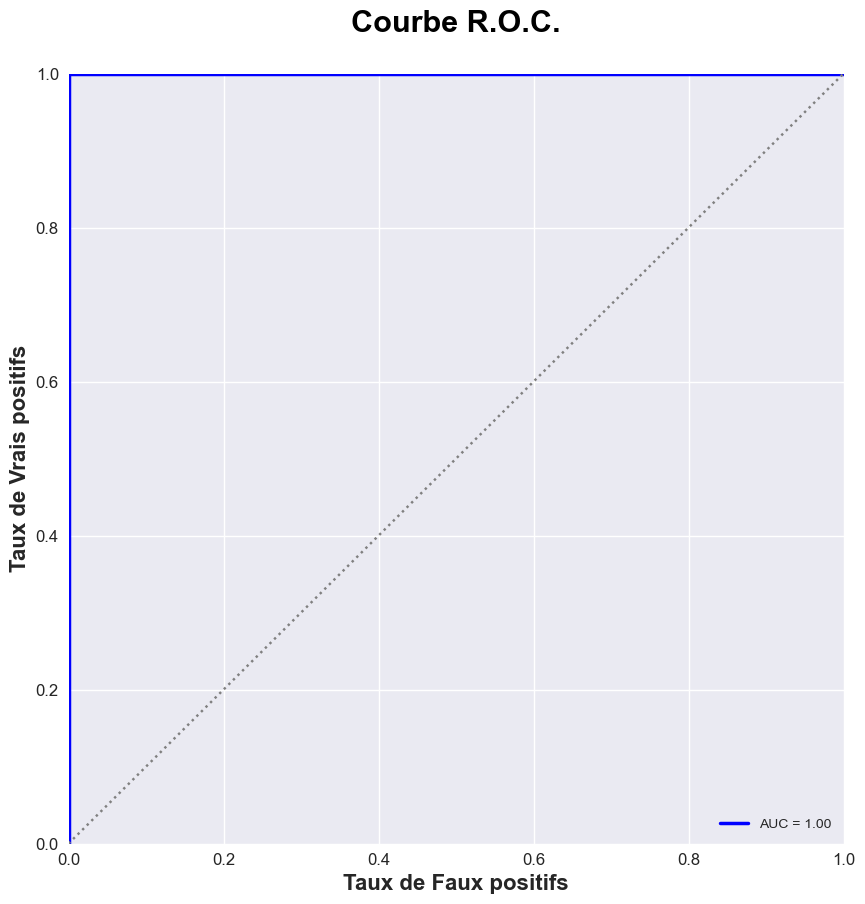

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Définir les variables de la courbe ROC
fpr, tpr, thresholds = roc_curve(billets_test['Prédiction K-NN'], predicted_results['Prédiction K-NN'])
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Courbe R.O.C.",
             fontsize=22, weight='bold', color='Black', loc='center', pad=30)
plt.box(True)

plt.plot(fpr, tpr, color="blue", linewidth=2.5, label="AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], color="grey", linestyle=":")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.ylabel("Taux de Vrais positifs", weight='bold', size=16)
plt.xlabel("Taux de Faux positifs", weight='bold', size=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()




In [98]:
roc_auc

1.0

## Conclusion


In [99]:
df = pd.DataFrame({'Précision en %': [Precision_kmeans, Precision_kNN, Precision_reg] },
                      index = ['K-means', 'kNN', 'Régression logistique'])

df['Précision en %']=(df['Précision en %']*100).round(4)
df

,Précision en %
K-means,97.4619
kNN,98.9691
Régression logistique,98.9691


## Fonction de détection les vrais des faux billets

In [100]:
def prog_vérification_billets(csv):
    billet_test= pd.read_csv(csv)
    billet_value=billet_test.drop('id', axis=1)
    billet_test['Prédiction RegLog'] = reg_log_multi.predict(billet_value) >= 0.5
    billet_test['Prob Faux']=(1-(reg_log_multi.predict(billet_value))).round(3)
    billet_test["Prédiction K-means"] = kmeans.predict(billet_value)
    billet_test['Prédiction K-means'].replace([1,0],[True,False], inplace=True)
    billet_test['Prédiction K-nn'] = knn.predict(billet_value)
    billet_test['Prédiction K-nn'].replace([1,0],[True,False], inplace=True)  
 
    billets_predict = billet_test[['id','Prob Faux','Prédiction RegLog','Prédiction K-means','Prédiction K-nn']].set_index("id")
    return billets_predict

In [ ]:
# Tester la fonction
prog_vérification_billets('billets_production.csv')